## Exploratory Data Analysis (EDA) for House Prices Competition 🏠📊

### 1. Setup
I import the libraries I’ll need for exploration and set a simple visual style so every plot looks clean and readable.

In [1]:
# core
import pandas as pd
import numpy as np

# visuals
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# prettier plots
sns.set_theme(style="whitegrid", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams['figure.dpi'] = 100

# display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### 2. Load Data
I load the raw CSV files and take a quick look at shapes and a sample of rows.

In [2]:
# Load train and test datasets
train = pd.read_csv("../data/raw/train.csv")
test = pd.read_csv("../data/raw/test.csv")

print(f"train shape: {train.shape}")
print(f"test  shape: {test.shape}")

# Show first rows of train dataset
train.head(10)

train shape: (1460, 81)
test  shape: (1459, 80)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd        NaN   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng        NaN   
9          1950     Gable  CompShg     MetalSd     MetalSd        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

In [3]:
# Set 'Id' as the index and remove it from the columns
train.set_index("Id", inplace=True)
test.set_index("Id", inplace=True)

# Verify that 'Id' is no longer in the columns
print("Columns after setting index:", train.columns.tolist())

Columns after setting index: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch

### 3. Basic numerical summary
I want a bird-eye view of the numerical features: count, mean, quartiles, extremes.

In [4]:
# Main statistics for numerical features
train.describe().transpose()

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1980.0    2

#### Conclusions from Basic Numerical Summary

- **MSSubClass**  
  - Values range from 20 to 190, with median at 50.  
  - Many house types (code 20) and fewer high-value categories → may need one-hot encoding.

- **LotFrontage**  
  - 1201 non-null out of 1460 → ~18% missing.  
  - Mean ≈ 70 ft, but max = 313 ft → some very large frontages to inspect.

- **LotArea**  
  - Wide spread: mean ≈ 10 500 ft², std ≈ 10 000 ft², max = 215 000 ft².  
  - Strong variability suggests potential outliers.

- **OverallQual & OverallCond**  
  - Quality avg ≈ 6, condition avg ≈ 5.6 on a 1–10 scale.  
  - Both are ordinal; small range of values → treat as categorical/ordinal.

- **YearBuilt & YearRemodAdd**  
  - Built between 1872 and 2010, mean ≈ 1971; remodel mean ≈ 1985.  
  - Remodel often decades after build → consider “house age” features.

- **MasVnrArea**  
  - Mostly zero (median = 0), mean ≈ 104 ft², max = 1600 ft².  
  - Many houses have no veneer → zero‐fill vs median imputation decision.

- **Basement & Living Areas**  
  - TotalBsmtSF mean ≈ 1057 ft², std ≈ 439; GrLivArea mean ≈ 1515 ft².  
  - Some extreme values (e.g., 6110 ft² basement) → investigate outliers.

- **Bathrooms & Rooms**  
  - FullBath avg ≈ 1.6, BsmtFullBath avg ≈ 0.4.  
  - Most houses have 1–2 baths; a few have 3 → check for data quality.

- **Garage**  
  - GarageCars avg ≈ 1.8, GarageArea avg ≈ 473 ft², but 81 missing values.  
  - Missing likely indicates no garage → fill with 0 or “None.”

- **Porches & Decks**  
  - WoodDeckSF mean ≈ 94 ft², OpenPorchSF mean ≈ 47 ft²; many zeros.  
  - Zero vs positive split → zero indicates absence.

- **PoolArea & MiscVal**  
  - Almost all zeros, max = 738 ft² / $15 500.  
  - Very rare features → treat as “has” vs “has not.”

- **SalePrice**  
  - Mean ≈ 180 921, std ≈ 79 443, range [34 900, 755 000].  
  - Noticeable right skew and several high-value outliers → consider log transform later.

- **MoSold & YrSold**  
  - Sales span Jan–Dec, years 2006–2010 (peak 2007–2009).  
  - Month and year categorical vs cyclic treatment possible.

---

> **Next steps:**  
> - Impute or drop columns with many missing values.  
> - Investigate and handle outliers in area features.  
> - Engineer age features (e.g. current year − YearBuilt).  
> - Defer log-transform of `SalePrice` and missing-value handling to preprocessing.  
> - Encode ordinal features (`OverallQual`, `OverallCond`) appropriately.  


### 4. Missing-value landscape
I check how many values are missing per column and what share of the dataset they occupy.
No imputation here — just mapping the territory.

In [5]:
na_count = train.isna().sum()
na_pct   = (na_count / len(train) * 100).round(2)

na_df = (
    pd.concat([na_count, na_pct], axis=1, keys=["missing_cnt", "missing_pct"])
    .sort_values(by="missing_cnt", ascending=False)
)

na_df[na_df.missing_cnt > 0]

missing_cnt  missing_pct
PoolQC               1453        99.52
MiscFeature          1406        96.30
Alley                1369        93.77
Fence                1179        80.75
MasVnrType            872        59.73
FireplaceQu           690        47.26
LotFrontage           259        17.74
GarageYrBlt            81         5.55
GarageCond             81         5.55
GarageType             81         5.55
GarageFinish           81         5.55
GarageQual             81         5.55
BsmtExposure           38         2.60
BsmtFinType2           38         2.60
BsmtCond               37         2.53
BsmtQual               37         2.53
BsmtFinType1           37         2.53
MasVnrArea              8         0.55
Electrical              1         0.07

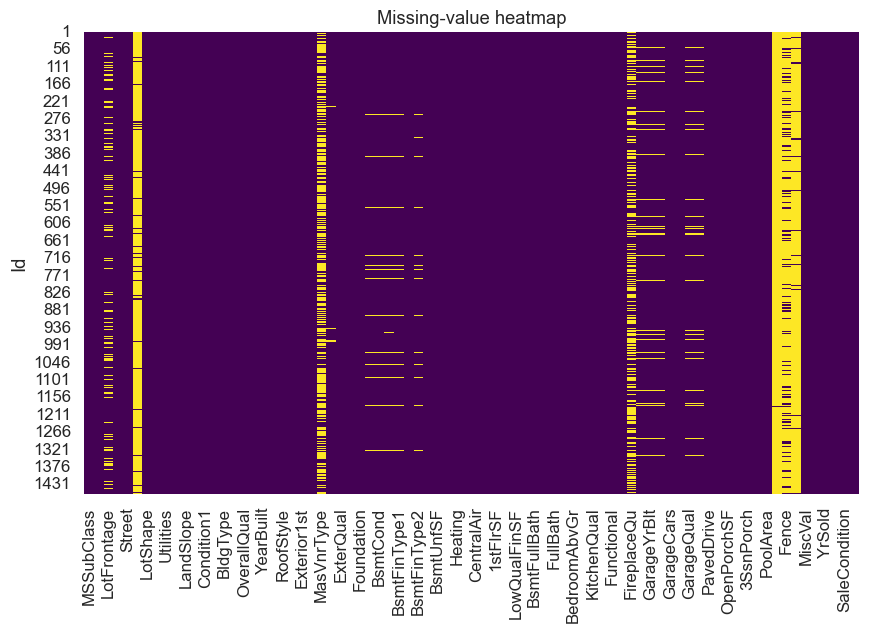

In [6]:
# quick visual heatmap to see where gaps reside
sns.heatmap(train.isna(), cbar=False, cmap='viridis')
plt.title("Missing-value heatmap")
plt.show()

#### Conclusions from Missing-Value Landscape

| Feature block            | % Missing | Interpretation & planned action |
|--------------------------|-----------|---------------------------------|
| **PoolQC**               | 99.5 %    | Almost no pools → drop column *or* make binary “HasPool”. |
| **MiscFeature**          | 96.3 %    | Rare extras (sheds, tennis courts) → same strategy as PoolQC. |
| **Alley**                | 93.8 %    | Alley access is exceptional → convert to “HasAlley” or drop. |
| **Fence**                | 80.8 %    | Most houses have no fence → treat missing as “NA”. |
| **MasVnrType / MasVnrArea** | 59.7 % / 0.6 % | Missing means *no masonry veneer* → fill type with “NA” and area with 0. |
| **FireplaceQu**          | 47.3 %    | Missing = no fireplace → fill with “NA”. |
| **LotFrontage**          | 17.7 %    | True numeric gaps; impute using median *per neighborhood* to preserve locality effect. |
| **Garage\*** (Type, YrBlt, Finish, Qual, Cond) | 5.6 % | Missing implies no garage; fill categorical with “NA”, numeric with 0. |
| **Basement\*** (Qual, Cond, Exp, FinType1/2) | ~2.6 % | Missing = no basement; fill with “NA”. |
| **Electrical**           | 0.07 %    | Single row; safest to fill with mode (“SBrkr”). |

##### Key takeaways
* Ultra-sparse columns (≥ 90 % NaN) add almost no information — I’ll either drop them or collapse to simple yes/no flags.  
* For structural elements (pool, fence, fireplace, garage, basement) **missingness is meaningful** and should be encoded as “None” or 0 rather than imputed statistically.  
* `LotFrontage` is the only sizable *numeric* gap; neighbourhood-level median imputation should minimise bias.  
* All other gaps are minor and can be filled with straightforward defaults (mode or zero).

> I’ll implement these imputation rules in **02_preprocess.py**; nothing is modified at the EDA stage.


### 5. Unique-value counts
Low-cardinality columns hint at categories; high counts scream continuous.

In [7]:
unique_counts = train.nunique().sort_values(ascending=False)
unique_counts

LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
LotFrontage       110
GarageYrBlt        97
ScreenPorch        76
YearRemodAdd       61
Neighborhood       25
LowQualFinSF       24
MiscVal            21
3SsnPorch          20
Exterior2nd        16
MSSubClass         15
Exterior1st        15
MoSold             12
TotRmsAbvGrd       12
OverallQual        10
Condition1          9
SaleType            9
OverallCond         9
HouseStyle          8
BedroomAbvGr        8
RoofMatl            8
PoolArea            8
Condition2          8
Functional          7
GarageType          6
SaleCondition       6
BsmtFinType1        6
Foundation          6
Heating             6
RoofStyle           6
BsmtFinType2        6
Electrical

### 6. Feature-type split based on dataset documentation
I already have a definitive list of which columns are truly numerical and which are categorical from the data description. I no longer need to rely on select_dtypes + “pseudo_cats”—I can just assign them directly:

In [8]:
# Define feature types explicitly (no heuristics needed)
numeric_features = [
    "LotFrontage","LotArea","YearBuilt","YearRemodAdd","MasVnrArea",
    "BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
    "2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath",
    "FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd",
    "Fireplaces","GarageYrBlt","GarageCars","GarageArea","WoodDeckSF",
    "OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea",
    "MiscVal"
]

categorical_features = [
    "MSZoning","Street","Alley","LotShape","LandContour","Utilities",
    "LotConfig","LandSlope","Neighborhood","Condition1","Condition2",
    "BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st",
    "Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation",
    "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
    "Heating","HeatingQC","CentralAir","Electrical","KitchenQual",
    "Functional","FireplaceQu","GarageType","GarageFinish","GarageQual",
    "GarageCond","PavedDrive","PoolQC","Fence","MiscFeature","SaleType",
    "SaleCondition","MoSold","YrSold","MSSubClass","OverallQual","OverallCond"
]

print(f"{len(numeric_features)} numeric features, {len(categorical_features)} categorical features")


31 numeric features, 48 categorical features


### 7. Target distribution and outliers (SalePrice)
I visualise the raw sale price distribution.
I’ll decide later in preprocessing whether to apply a log transform.

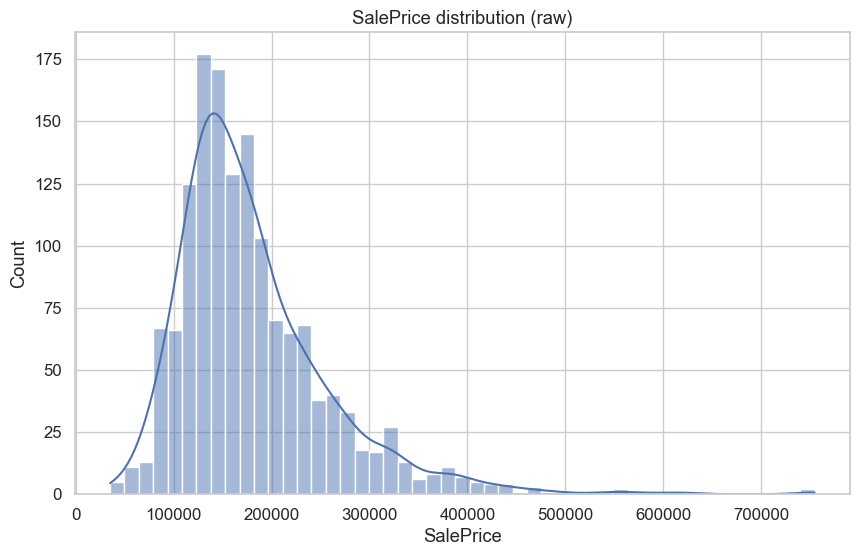

skew : 1.88


In [9]:
sns.histplot(train["SalePrice"], kde=True)
plt.title("SalePrice distribution (raw)")
plt.show()

print("skew :", skew(train["SalePrice"]).round(2))

Target outliers detection

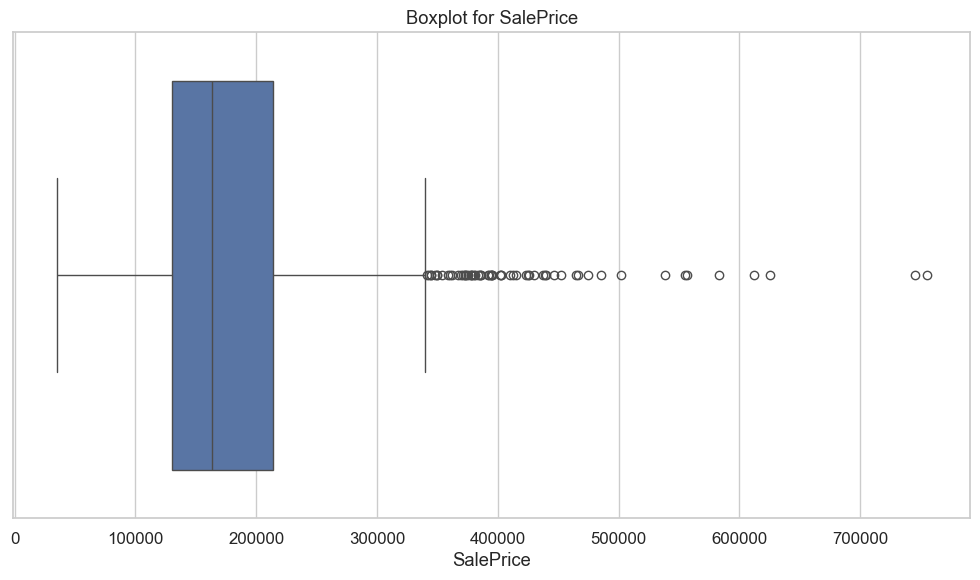

In [10]:
# Create a boxplot to visualize the distribution and identify outliers in SalePrice
sns.boxplot(x=train["SalePrice"])

# Set plot title and axis labels
plt.title("Boxplot for SalePrice")
plt.xlabel("SalePrice")
plt.tight_layout()
plt.show()

#### Conclusions from Target Distribution (`SalePrice`)

* **Shape**  
  * The histogram is strongly **right-skewed** (skew ≈ **1.88**): most homes sell between \$100 k – \$250 k, while a long tail stretches beyond \$500 k.  
  * Mean (\$181 k) > median (\~\$163 k), confirming the asymmetry.

* **Spread**  
  * Roughly 75 % of sales fall below \$214 k (upper quartile).  
  * Extreme outliers reach \$755 k and could dominate models that minimise squared error.

* **Implications**  
  * Linear models expect near-normal residuals; the current skew will break that assumption.  
  * High-price outliers may unduly influence the loss function unless addressed (log transform or robust loss).

* **Next steps (handled in preprocessing)**  
  * Apply `log1p(SalePrice)` to reduce skewness and stabilise variance.  
  * Inspect the top 1 % most expensive houses; consider winsorising or retaining with caution.


### 8. Continuous-feature skewness
I compute skew only; transformations come later.

In [11]:
cont_skews = (
    train[numeric_features]
    .apply(lambda x: skew(x.dropna()))
    .sort_values(ascending=False)
)

cont_skews

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.666326
OpenPorchSF       2.361912
LotFrontage       2.160866
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
BedroomAbvGr      0.211572
GarageArea        0.179796
FullBath          0.036524
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
GarageYrBlt      -0.648708
dtype: float64

#### Conclusions from Continuous-Feature Skewness

| Skewness band | Features | Comment & planned action |
|---------------|----------|--------------------------|
| **Severe (>3)** | `MiscVal` (24.45), `PoolArea` (14.81), `LotArea` (12.20), `3SsnPorch` (10.29), `LowQualFinSF` (9.00) | Extremely long right tails; log-transform or convert to binary *has / has-not* flags. |
| **High (1 – 3)** | `KitchenAbvGr`, `BsmtFinSF2`, `ScreenPorch`, `BsmtHalfBath`, `EnclosedPorch`, `MasVnrArea`, `OpenPorchSF`, `LotFrontage`, `BsmtFinSF1`, `WoodDeckSF`, `TotalBsmtSF`, `1stFlrSF`, `GrLivArea` | Strong skew; log/Box-Cox transforms recommended, or consider clipping extreme values. |
| **Moderate (0.5 – 1)** | `BsmtUnfSF`, `2ndFlrSF`, `TotRmsAbvGrd`, `HalfBath`, `Fireplaces`, `BsmtFullBath` | Optional transformation; skew is noticeable but may be tolerable for tree models. |
| **Low (<0.5)** | `BedroomAbvGr`, `GarageArea`, `FullBath` | Close to symmetric; no transformation needed. |
| **Negative skew** | `GarageCars`, `YearRemodAdd`, `YearBuilt`, `GarageYrBlt` | Slight left tails; leave as-is unless a specific model shows sensitivity. |

##### Key takeaways
* **18 features have skew > 1** – these will benefit most from log/Box-Cox transformation to improve linear-model performance.  
* Ultra-skewed sparse features (`PoolArea`, `MiscVal`, etc.) may work better as **binary indicators** rather than numeric.  
* Tree-based models handle skew naturally, but consistent preprocessing (log + scaling) keeps the pipeline uniform.  

> I’ll apply the chosen transformations in **02_preprocess.py**; here we only record which columns require attention.


### 9. Outlier sniff-test
I want to inspect every truly continuous column with a boxplot + scatter against SalePrice. This shows both the spread and how extreme points relate to the target.

Continuous features (18): ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']


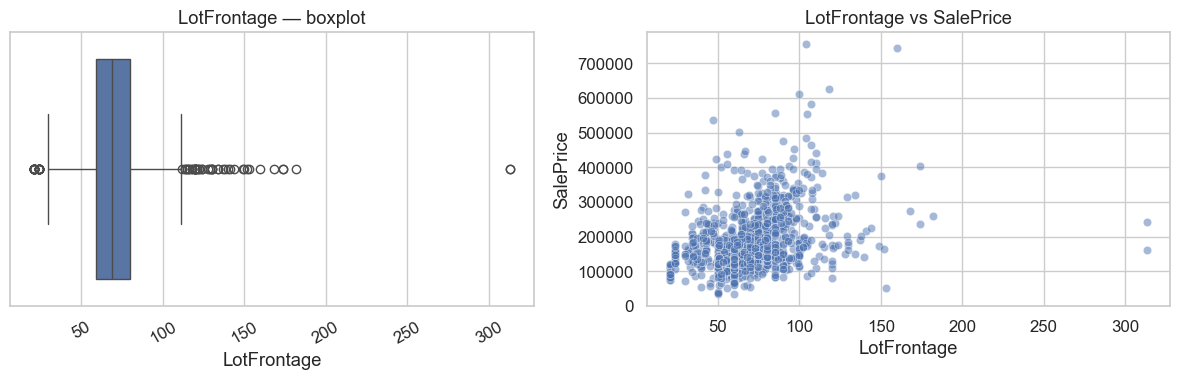

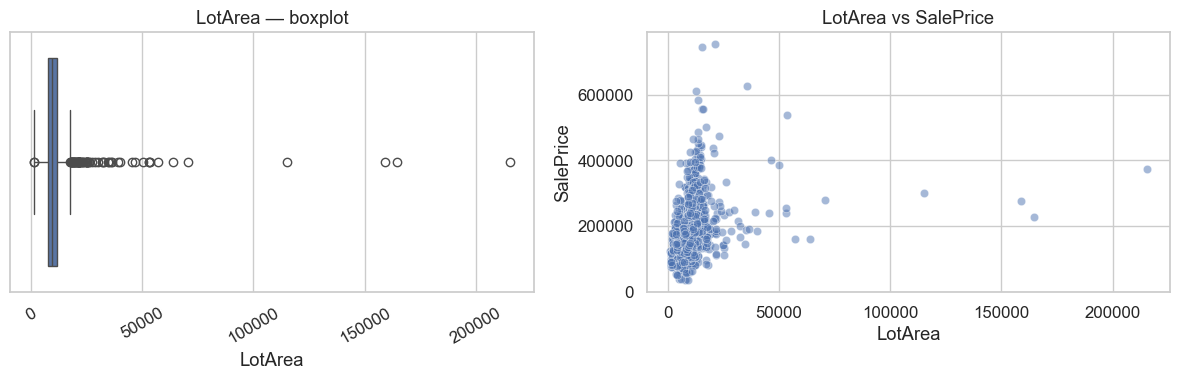

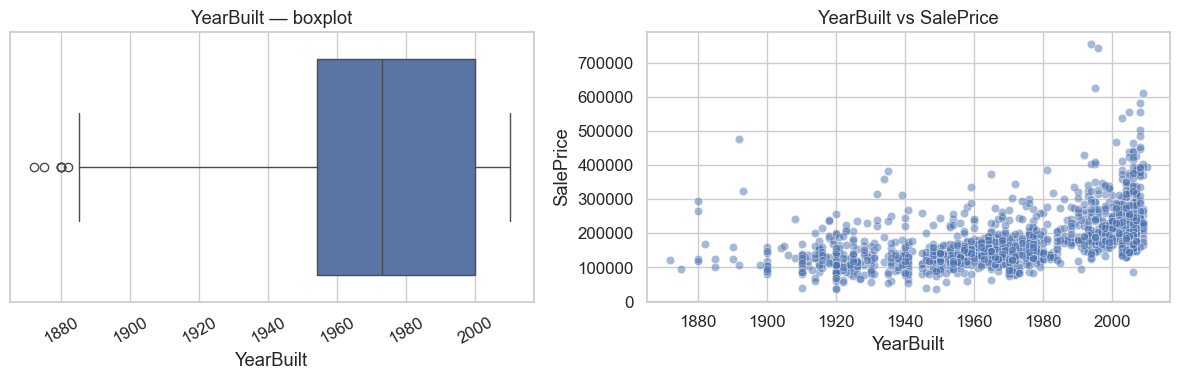

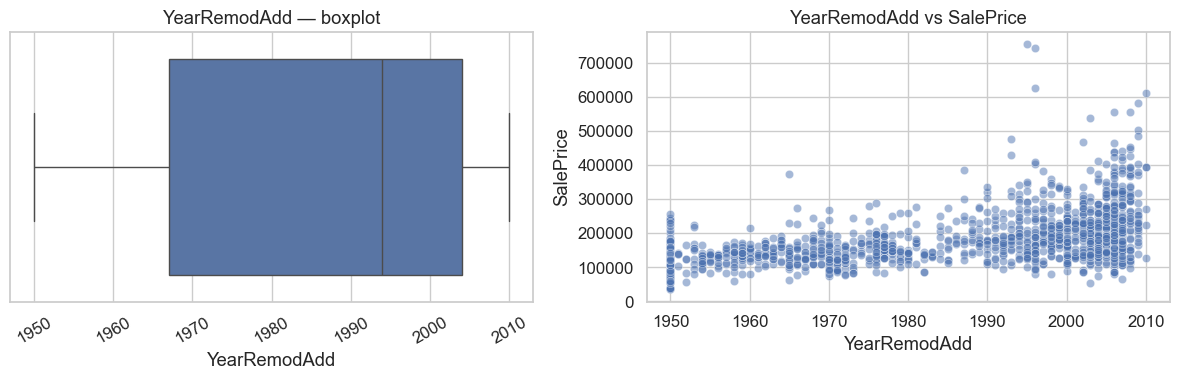

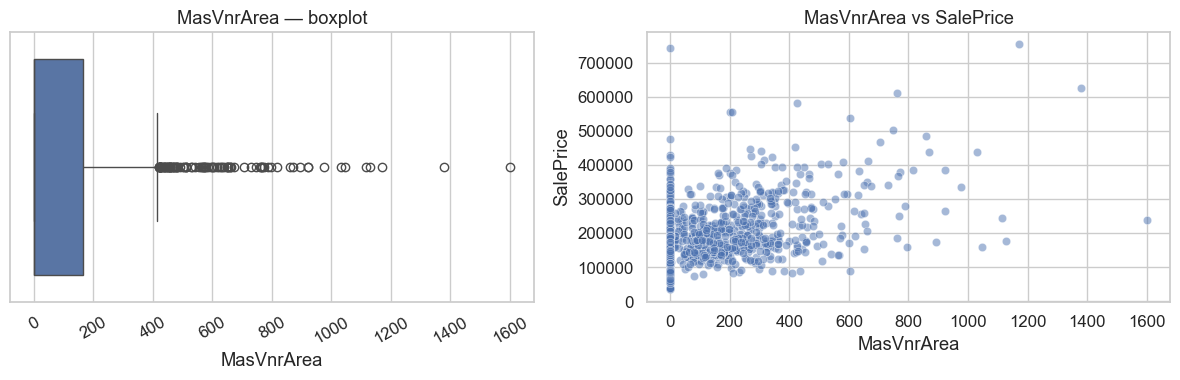

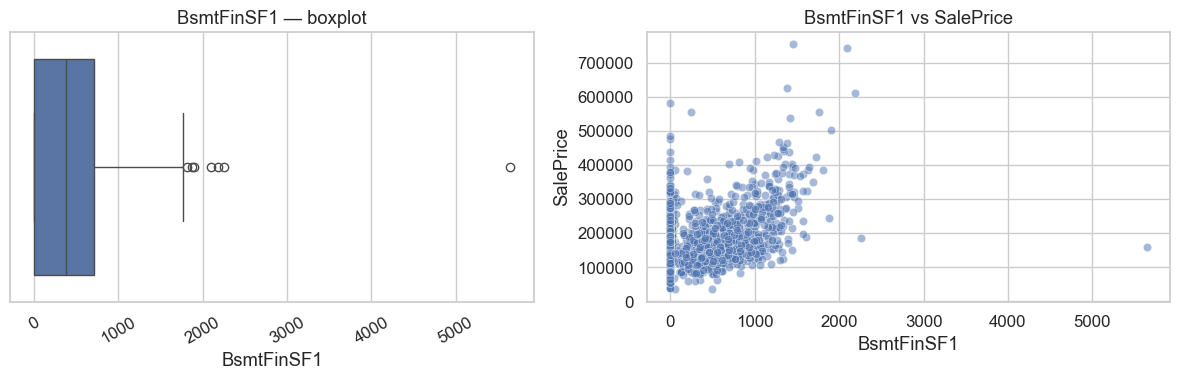

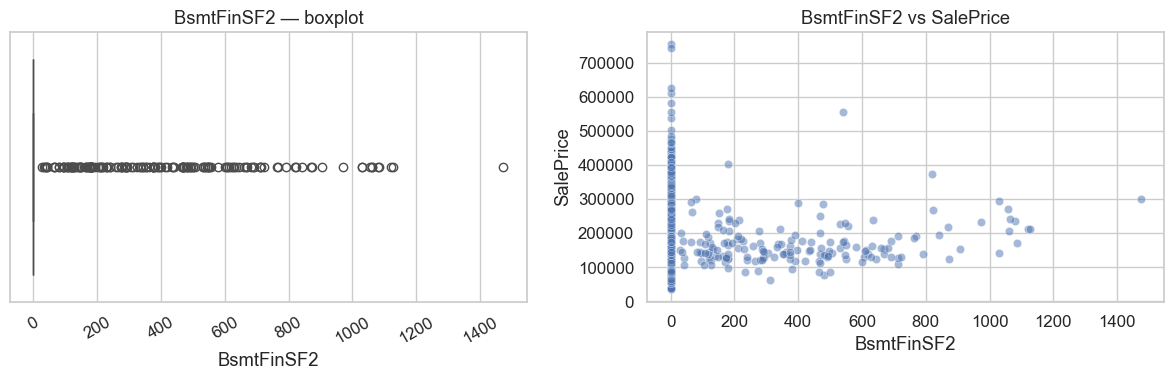

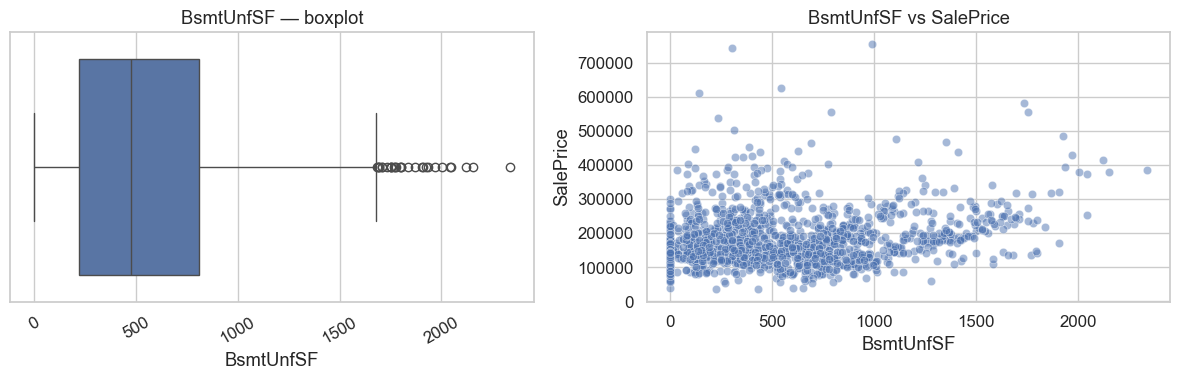

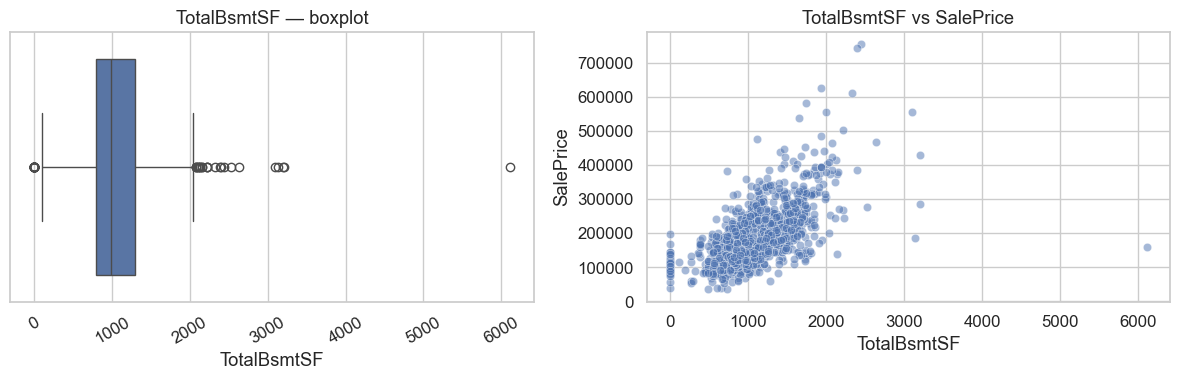

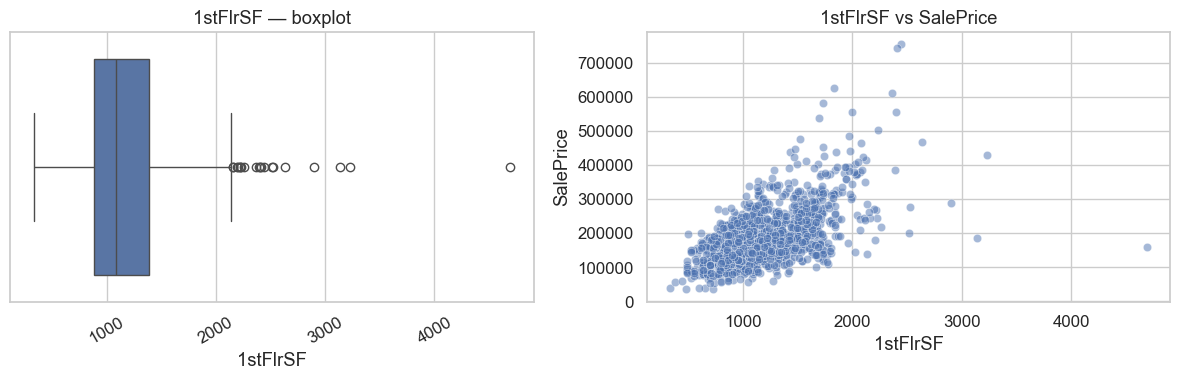

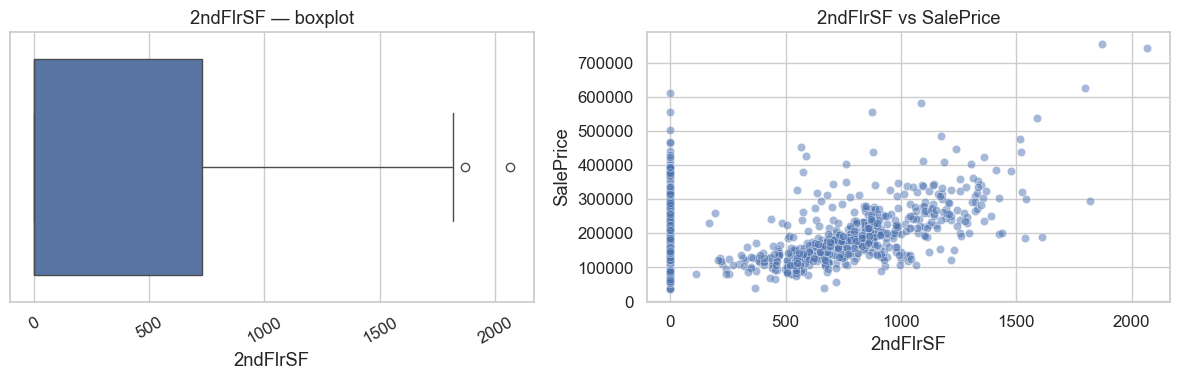

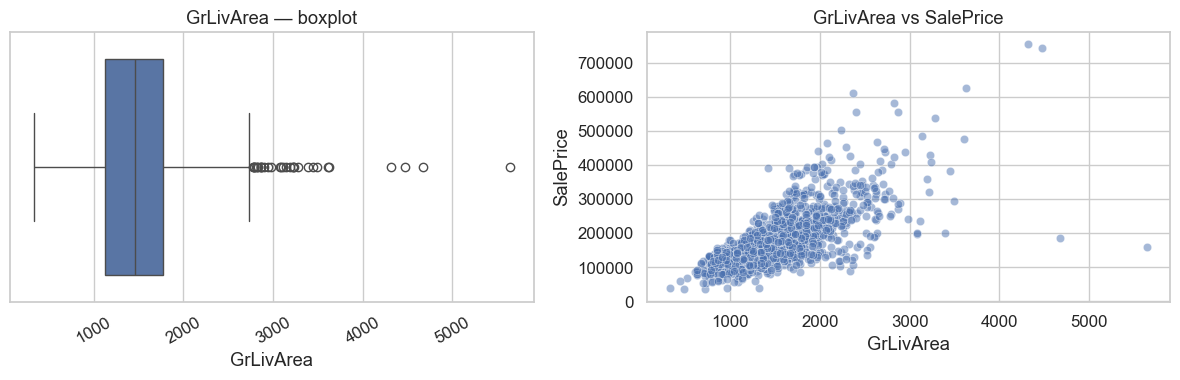

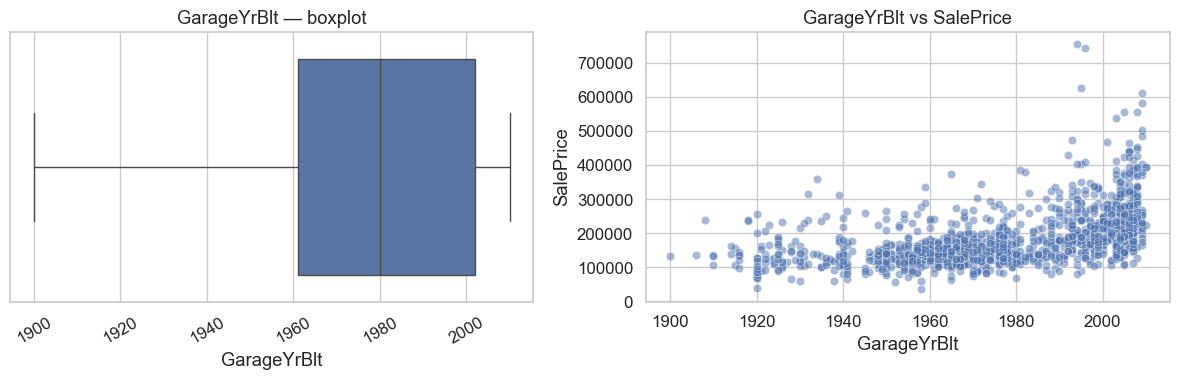

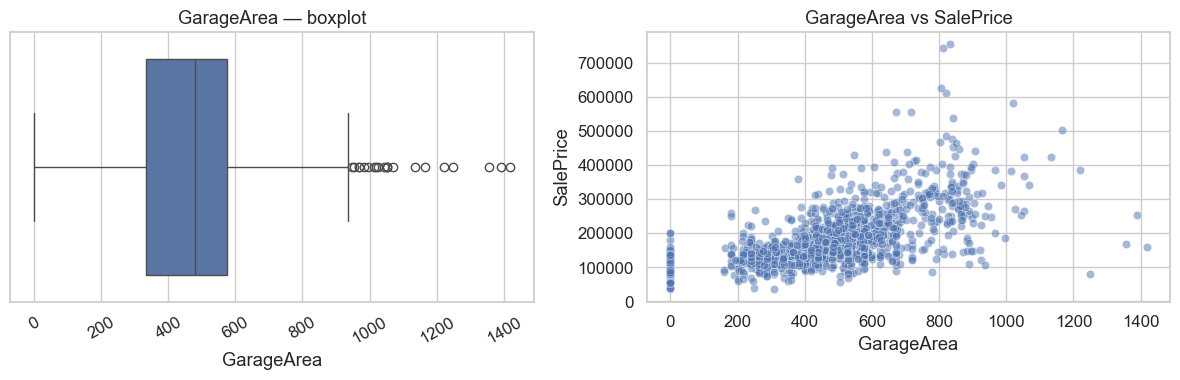

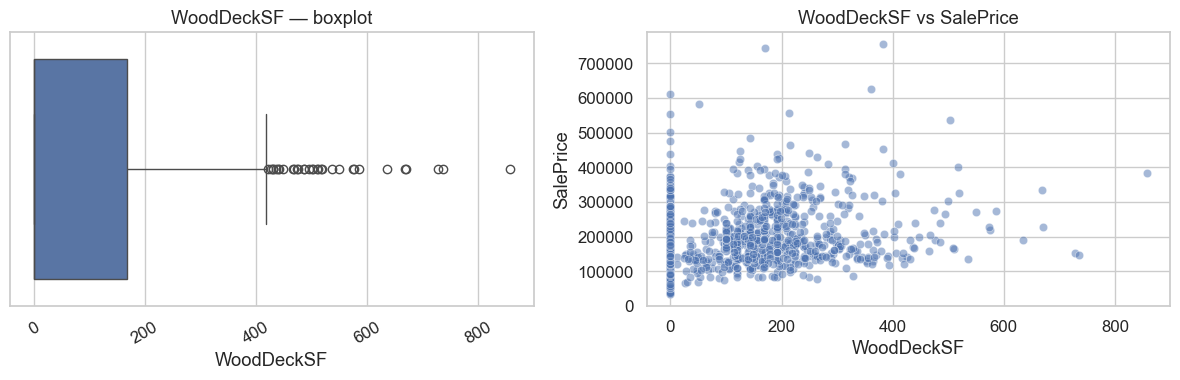

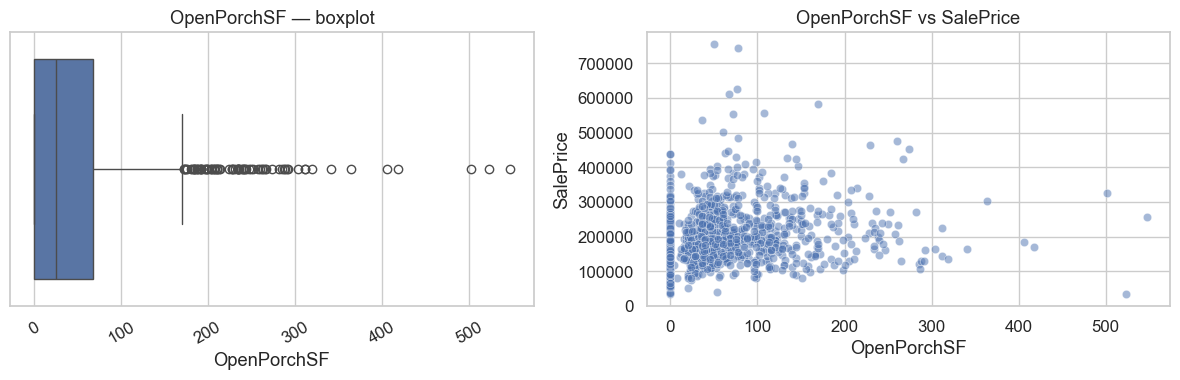

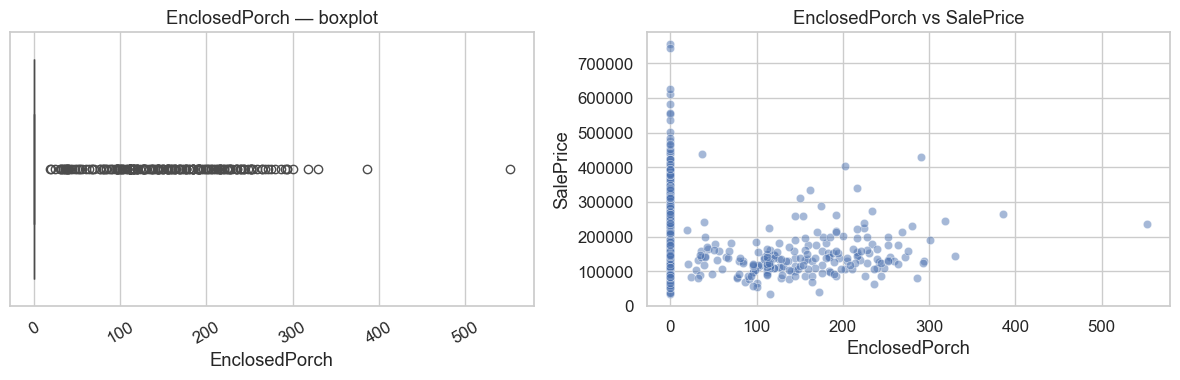

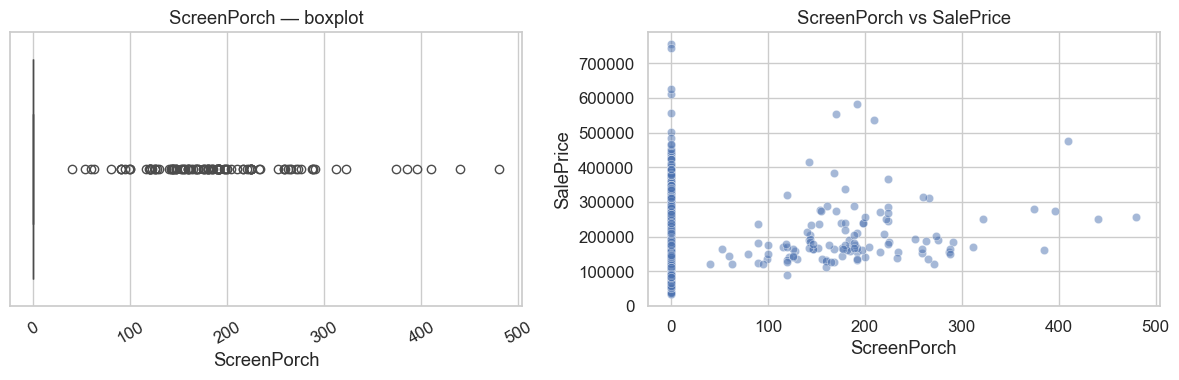

In [12]:
# Identify truly continuous features by data type and high cardinality
continuous_cols = [
    col for col in train.columns
    if col != "SalePrice"
    and train[col].dtype in [np.int64, np.float64]
    and train[col].nunique() > 50
]

print(f"Continuous features ({len(continuous_cols)}):", continuous_cols)

# Loop through each continuous feature for boxplot + scatterplot analysis
for col in continuous_cols:
    fig, (ax_box, ax_scat) = plt.subplots(1, 2, figsize=(12, 4))

    # Boxplot to inspect distribution and detect outliers
    sns.boxplot(x=train[col], ax=ax_box)
    ax_box.set_title(f"{col} — boxplot")
    ax_box.tick_params(axis='x', rotation=30)

    # Scatterplot vs SalePrice to see how values relate to the target
    sns.scatterplot(x=train[col], y=train["SalePrice"], alpha=0.5, ax=ax_scat)
    ax_scat.set_title(f"{col} vs SalePrice")
    ax_scat.set_xlabel(col)
    ax_scat.set_ylabel("SalePrice")

    plt.tight_layout()
    plt.show()

### 10. Categorical-feature overview
I analyze the distribution of categorical features to identify dominant and rare categories, which helps guide encoding strategies and improve model performance.


Feature analysis: 'MSZoning'
🔹 Unique values: 5
🔹 Rare categories (<1.0%): 1


Count  Percent
MSZoning                
RL         1151    78.84
RM          218    14.93
FV           65     4.45
RH           16     1.10
C (all)      10     0.68

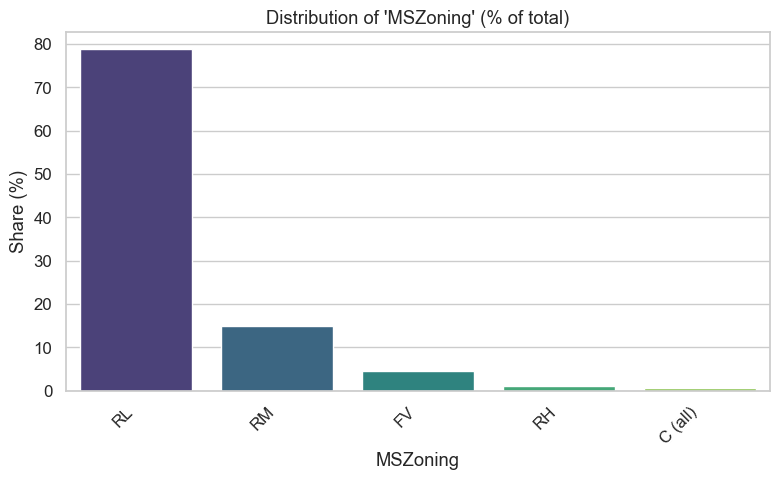


Rare categories:


Count  Percent
MSZoning                
C (all)      10     0.68


Feature analysis: 'Street'
🔹 Unique values: 2
🔹 Rare categories (<1.0%): 1
Dominant value detected: 99.59% — added to low_info_features


Count  Percent
Street                
Pave     1454    99.59
Grvl        6     0.41

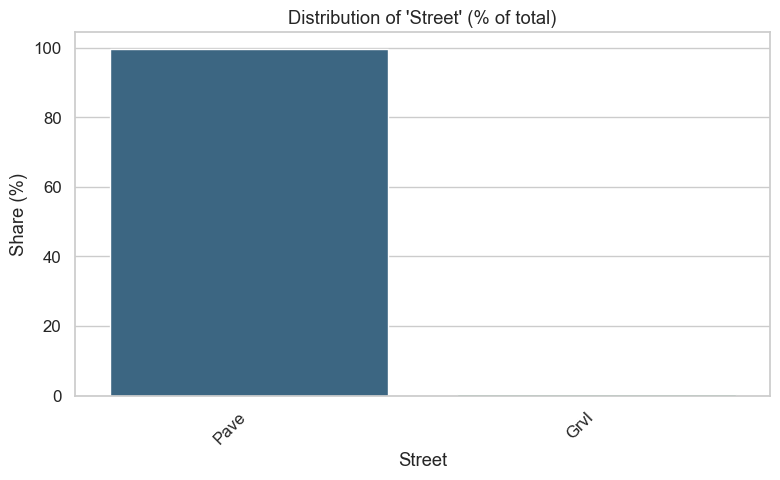


Rare categories:


Count  Percent
Street                
Grvl        6     0.41


Feature analysis: 'Alley'
🔹 Unique values: 3
🔹 Rare categories (<1.0%): 0


Count  Percent
Alley                
NaN     1369    93.77
Grvl      50     3.42
Pave      41     2.81

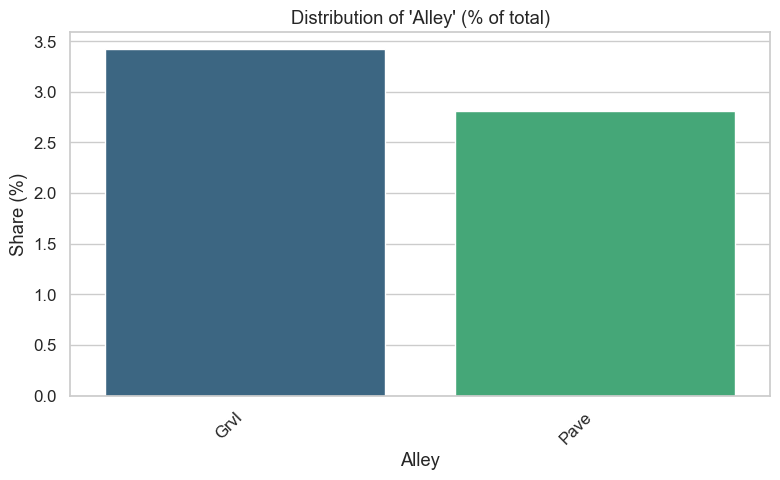


Feature analysis: 'LotShape'
🔹 Unique values: 4
🔹 Rare categories (<1.0%): 1


Count  Percent
LotShape                
Reg         925    63.36
IR1         484    33.15
IR2          41     2.81
IR3          10     0.68

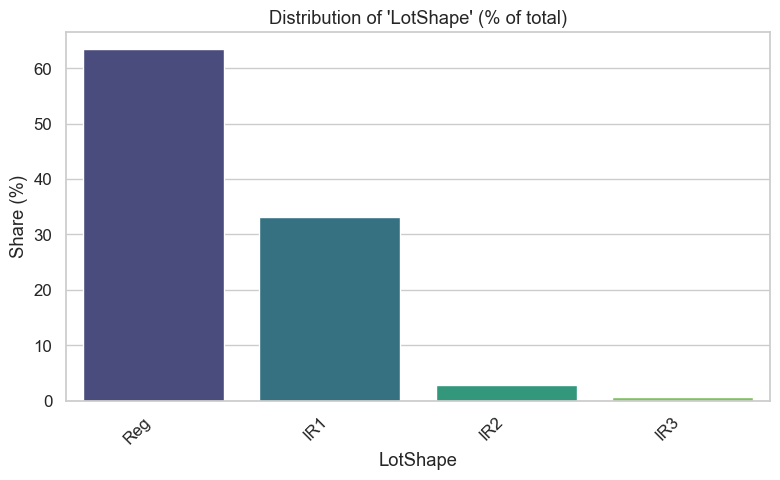


Rare categories:


Count  Percent
LotShape                
IR3          10     0.68


Feature analysis: 'LandContour'
🔹 Unique values: 4
🔹 Rare categories (<1.0%): 0


Count  Percent
LandContour                
Lvl           1311    89.79
Bnk             63     4.32
HLS             50     3.42
Low             36     2.47

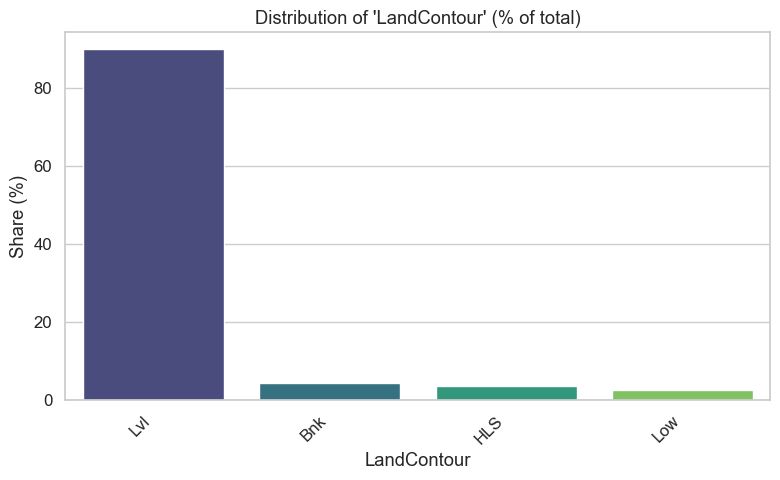


Feature analysis: 'Utilities'
🔹 Unique values: 2
🔹 Rare categories (<1.0%): 1
Dominant value detected: 99.93% — added to low_info_features


Count  Percent
Utilities                
AllPub      1459    99.93
NoSeWa         1     0.07

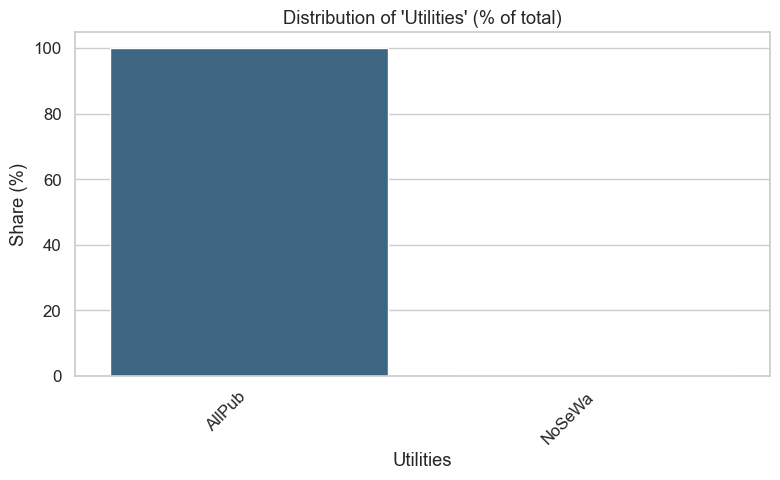


Rare categories:


Count  Percent
Utilities                
NoSeWa         1     0.07


Feature analysis: 'LotConfig'
🔹 Unique values: 5
🔹 Rare categories (<1.0%): 1


Count  Percent
LotConfig                
Inside      1052    72.05
Corner       263    18.01
CulDSac       94     6.44
FR2           47     3.22
FR3            4     0.27

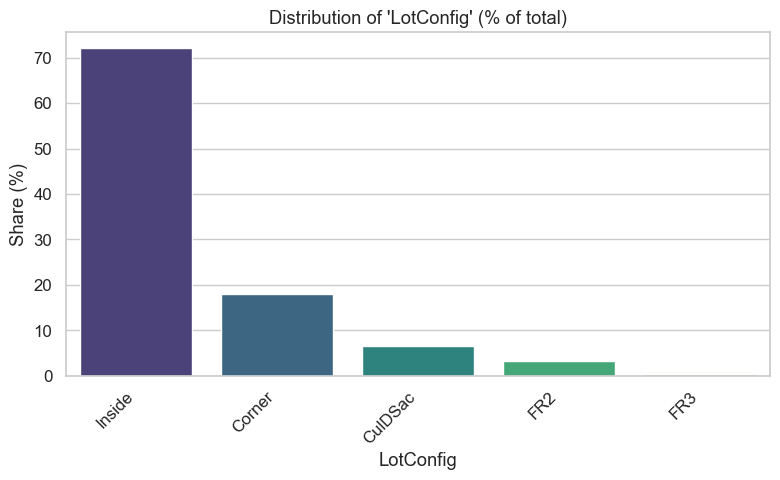


Rare categories:


Count  Percent
LotConfig                
FR3            4     0.27


Feature analysis: 'LandSlope'
🔹 Unique values: 3
🔹 Rare categories (<1.0%): 1


Count  Percent
LandSlope                
Gtl         1382    94.66
Mod           65     4.45
Sev           13     0.89

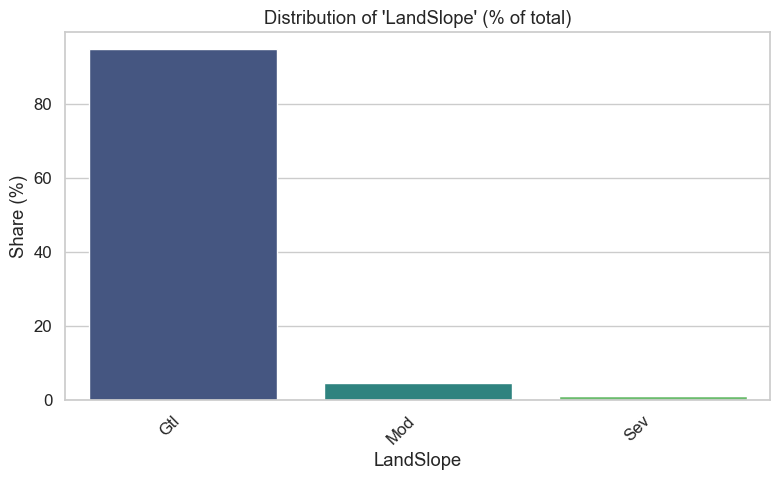


Rare categories:


Count  Percent
LandSlope                
Sev           13     0.89


Feature analysis: 'Neighborhood'
🔹 Unique values: 25
🔹 Rare categories (<1.0%): 3


Count  Percent
Neighborhood                
NAmes           225    15.41
CollgCr         150    10.27
OldTown         113     7.74
Edwards         100     6.85
Somerst          86     5.89
Gilbert          79     5.41
NridgHt          77     5.27
Sawyer           74     5.07
NWAmes           73     5.00
SawyerW          59     4.04
BrkSide          58     3.97
Crawfor          51     3.49
Mitchel          49     3.36
NoRidge          41     2.81
Timber           38     2.60
IDOTRR           37     2.53
ClearCr          28     1.92
StoneBr          25     1.71
SWISU            25     1.71
MeadowV          17     1.16
Blmngtn          17     1.16
BrDale           16     1.10
Veenker          11     0.75
NPkVill           9     0.62
Blueste           2     0.14

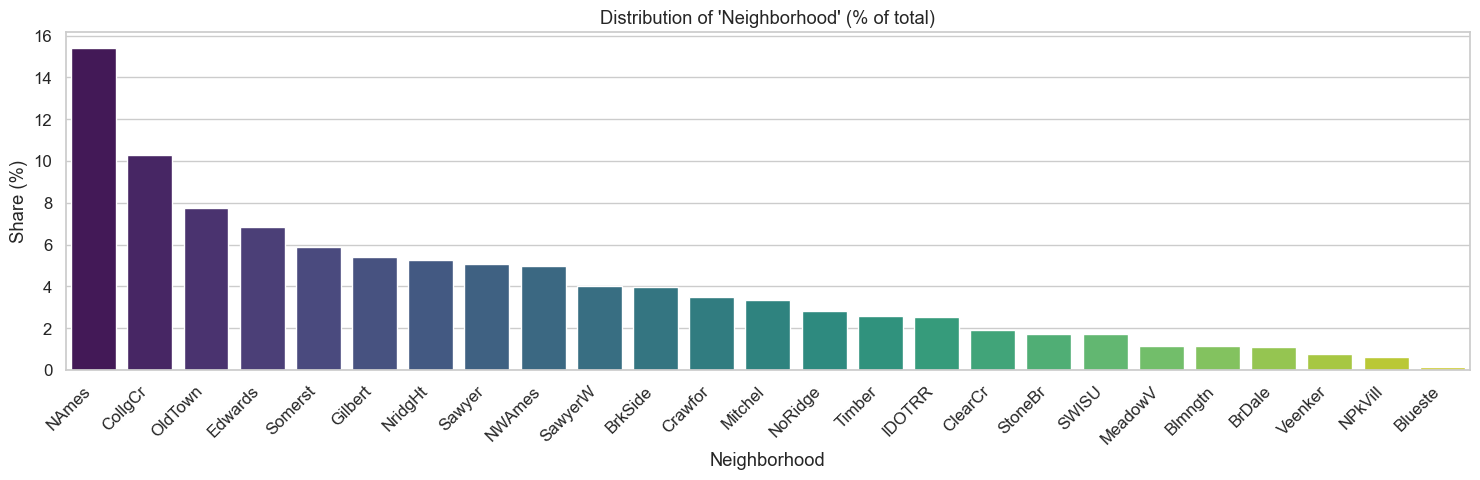


Rare categories:


Count  Percent
Neighborhood                
Veenker          11     0.75
NPkVill           9     0.62
Blueste           2     0.14


Feature analysis: 'Condition1'
🔹 Unique values: 9
🔹 Rare categories (<1.0%): 4


Count  Percent
Condition1                
Norm         1260    86.30
Feedr          81     5.55
Artery         48     3.29
RRAn           26     1.78
PosN           19     1.30
RRAe           11     0.75
PosA            8     0.55
RRNn            5     0.34
RRNe            2     0.14

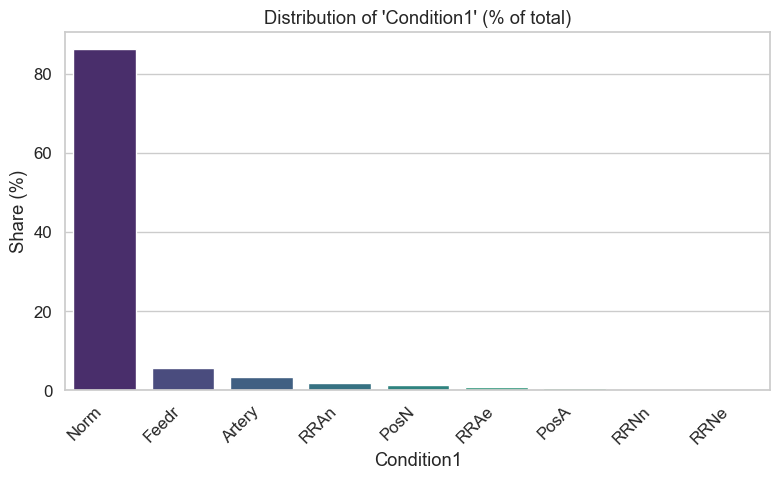


Rare categories:


Count  Percent
Condition1                
RRAe           11     0.75
PosA            8     0.55
RRNn            5     0.34
RRNe            2     0.14


Feature analysis: 'Condition2'
🔹 Unique values: 8
🔹 Rare categories (<1.0%): 7
Dominant value detected: 98.97% — added to low_info_features


Count  Percent
Condition2                
Norm         1445    98.97
Feedr           6     0.41
Artery          2     0.14
RRNn            2     0.14
PosN            2     0.14
PosA            1     0.07
RRAn            1     0.07
RRAe            1     0.07

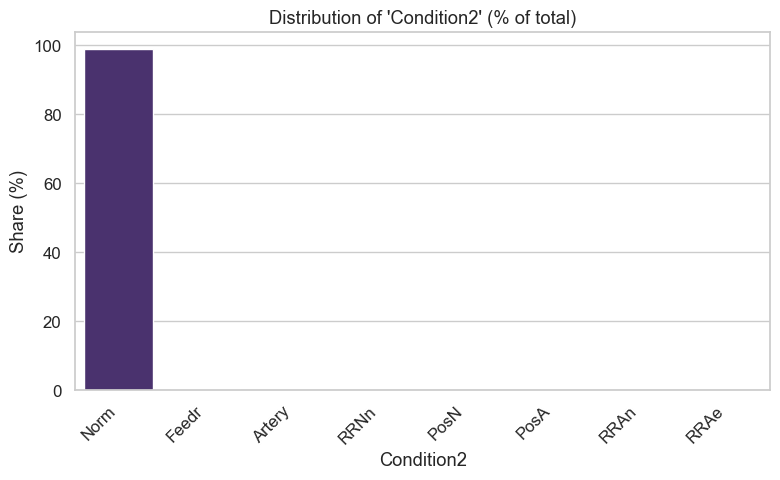


Rare categories:


Count  Percent
Condition2                
Feedr           6     0.41
Artery          2     0.14
RRNn            2     0.14
PosN            2     0.14
PosA            1     0.07
RRAn            1     0.07
RRAe            1     0.07


Feature analysis: 'BldgType'
🔹 Unique values: 5
🔹 Rare categories (<1.0%): 0


Count  Percent
BldgType                
1Fam       1220    83.56
TwnhsE      114     7.81
Duplex       52     3.56
Twnhs        43     2.95
2fmCon       31     2.12

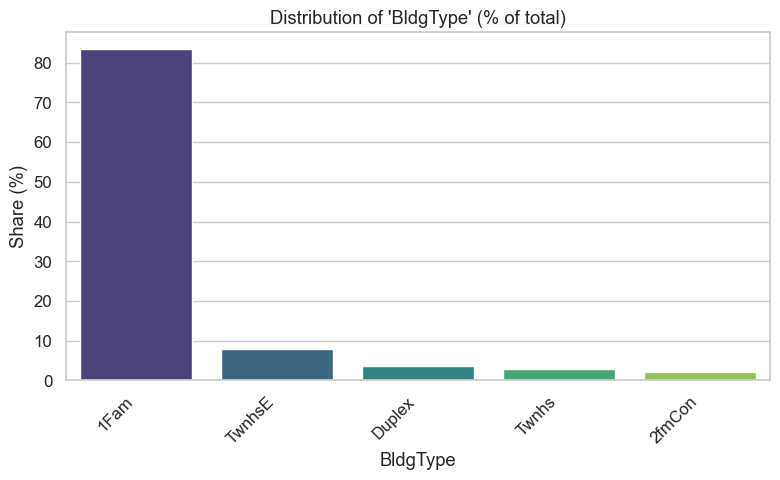


Feature analysis: 'HouseStyle'
🔹 Unique values: 8
🔹 Rare categories (<1.0%): 3


Count  Percent
HouseStyle                
1Story        726    49.73
2Story        445    30.48
1.5Fin        154    10.55
SLvl           65     4.45
SFoyer         37     2.53
1.5Unf         14     0.96
2.5Unf         11     0.75
2.5Fin          8     0.55

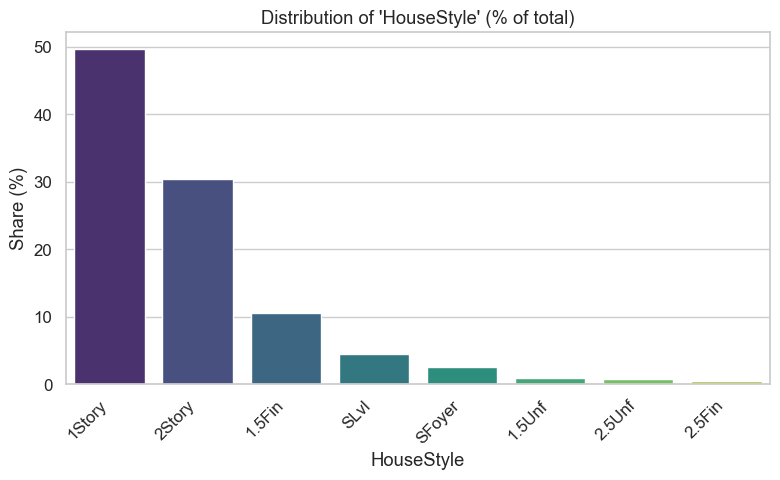


Rare categories:


Count  Percent
HouseStyle                
1.5Unf         14     0.96
2.5Unf         11     0.75
2.5Fin          8     0.55


Feature analysis: 'RoofStyle'
🔹 Unique values: 6
🔹 Rare categories (<1.0%): 4


Count  Percent
RoofStyle                
Gable       1141    78.15
Hip          286    19.59
Flat          13     0.89
Gambrel       11     0.75
Mansard        7     0.48
Shed           2     0.14

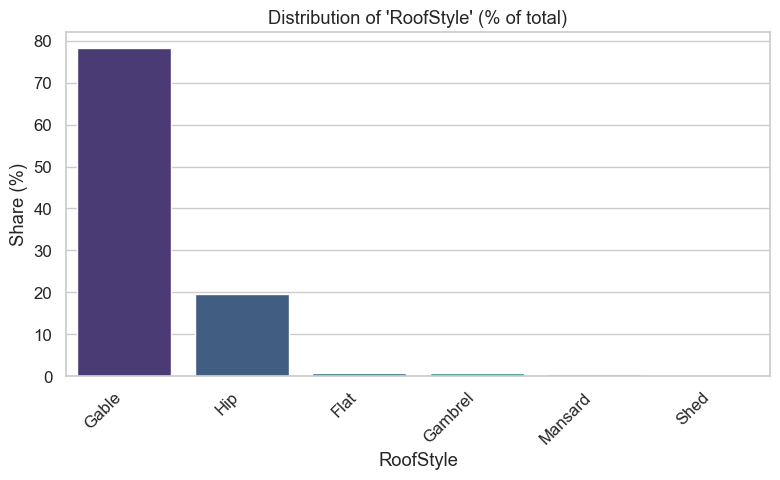


Rare categories:


Count  Percent
RoofStyle                
Flat          13     0.89
Gambrel       11     0.75
Mansard        7     0.48
Shed           2     0.14


Feature analysis: 'RoofMatl'
🔹 Unique values: 8
🔹 Rare categories (<1.0%): 7
Dominant value detected: 98.22% — added to low_info_features


Count  Percent
RoofMatl                
CompShg    1434    98.22
Tar&Grv      11     0.75
WdShngl       6     0.41
WdShake       5     0.34
Metal         1     0.07
Membran       1     0.07
Roll          1     0.07
ClyTile       1     0.07

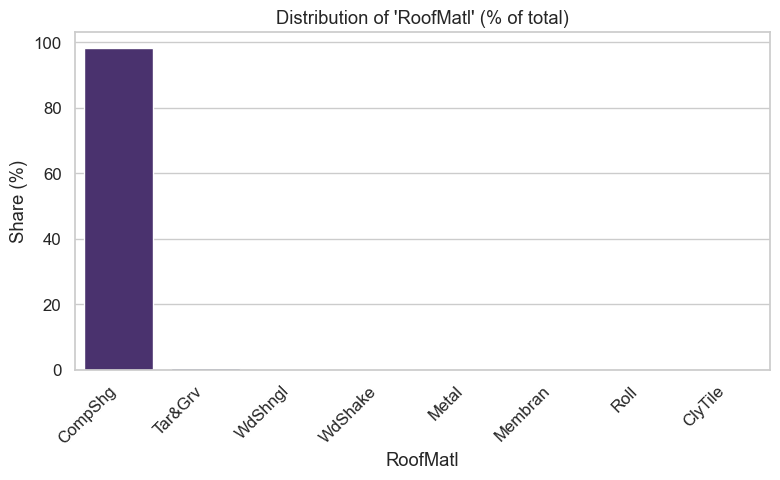


Rare categories:


Count  Percent
RoofMatl                
Tar&Grv      11     0.75
WdShngl       6     0.41
WdShake       5     0.34
Metal         1     0.07
Membran       1     0.07
Roll          1     0.07
ClyTile       1     0.07


Feature analysis: 'Exterior1st'
🔹 Unique values: 15
🔹 Rare categories (<1.0%): 5


Count  Percent
Exterior1st                
VinylSd        515    35.27
HdBoard        222    15.21
MetalSd        220    15.07
Wd Sdng        206    14.11
Plywood        108     7.40
CemntBd         61     4.18
BrkFace         50     3.42
WdShing         26     1.78
Stucco          25     1.71
AsbShng         20     1.37
BrkComm          2     0.14
Stone            2     0.14
AsphShn          1     0.07
ImStucc          1     0.07
CBlock           1     0.07

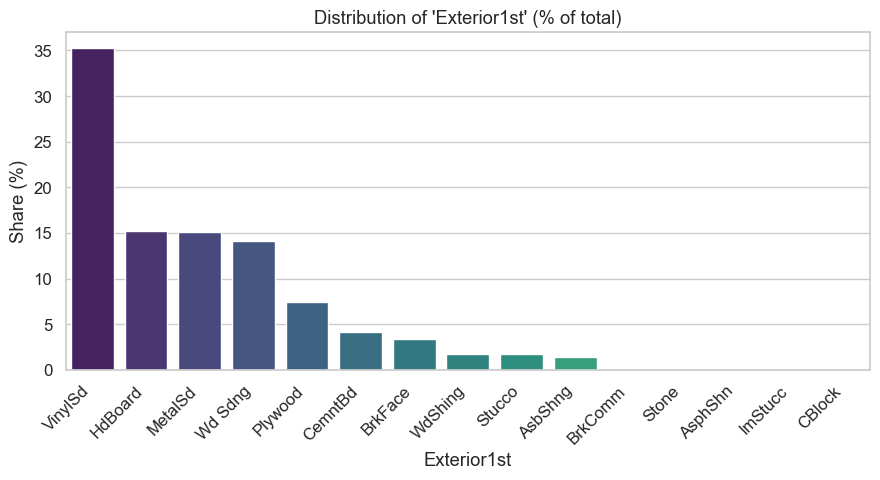


Rare categories:


Count  Percent
Exterior1st                
BrkComm          2     0.14
Stone            2     0.14
AsphShn          1     0.07
ImStucc          1     0.07
CBlock           1     0.07


Feature analysis: 'Exterior2nd'
🔹 Unique values: 16
🔹 Rare categories (<1.0%): 6


Count  Percent
Exterior2nd                
VinylSd        504    34.52
MetalSd        214    14.66
HdBoard        207    14.18
Wd Sdng        197    13.49
Plywood        142     9.73
CmentBd         60     4.11
Wd Shng         38     2.60
Stucco          26     1.78
BrkFace         25     1.71
AsbShng         20     1.37
ImStucc         10     0.68
Brk Cmn          7     0.48
Stone            5     0.34
AsphShn          3     0.21
Other            1     0.07
CBlock           1     0.07

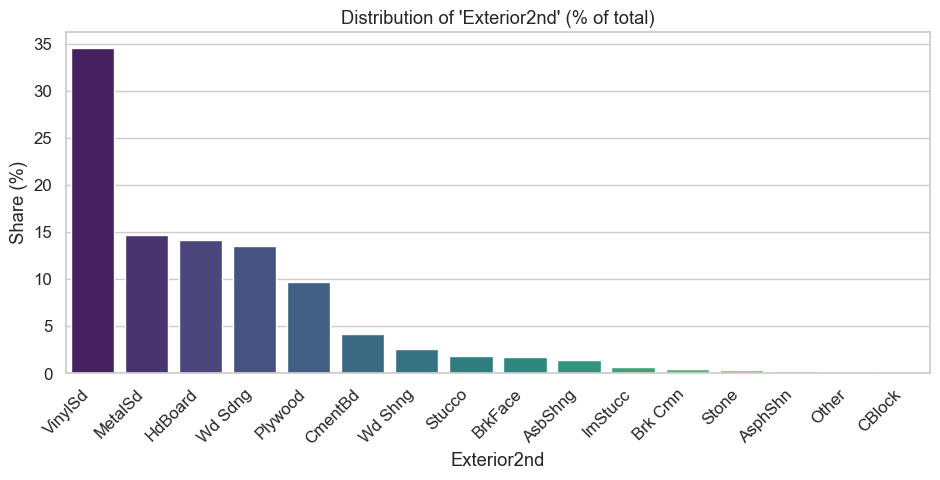


Rare categories:


Count  Percent
Exterior2nd                
ImStucc         10     0.68
Brk Cmn          7     0.48
Stone            5     0.34
AsphShn          3     0.21
Other            1     0.07
CBlock           1     0.07


Feature analysis: 'MasVnrType'
🔹 Unique values: 4
🔹 Rare categories (<1.0%): 0


Count  Percent
MasVnrType                
NaN           872    59.73
BrkFace       445    30.48
Stone         128     8.77
BrkCmn         15     1.03

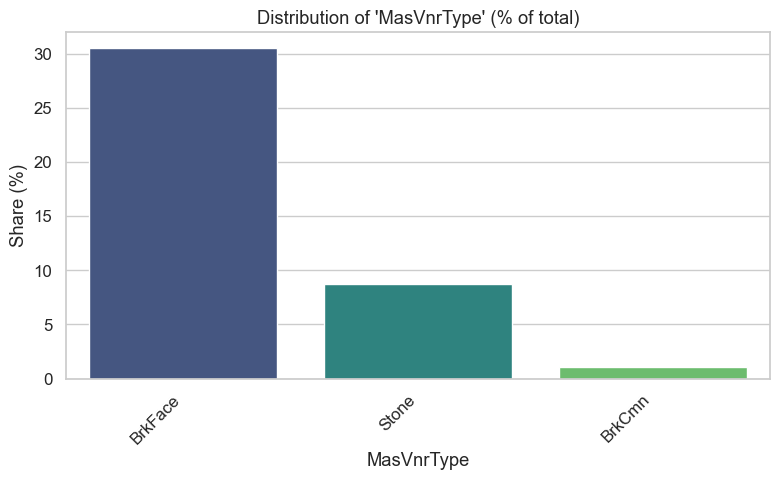


Feature analysis: 'ExterQual'
🔹 Unique values: 4
🔹 Rare categories (<1.0%): 1


Count  Percent
ExterQual                
TA           906    62.05
Gd           488    33.42
Ex            52     3.56
Fa            14     0.96

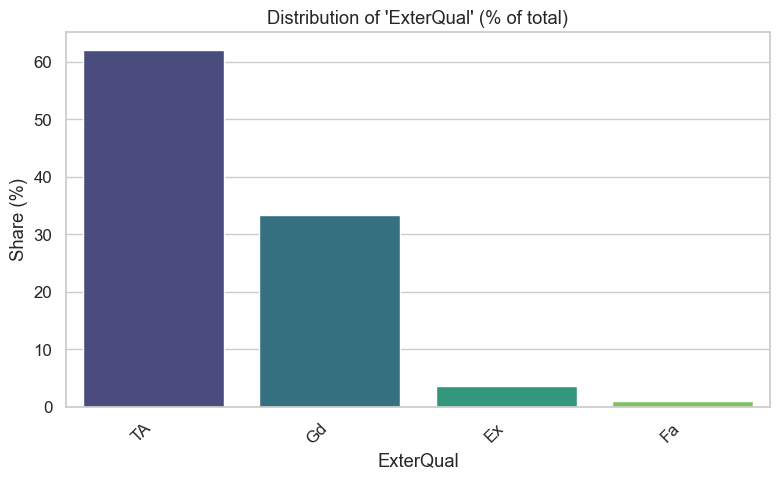


Rare categories:


Count  Percent
ExterQual                
Fa            14     0.96


Feature analysis: 'ExterCond'
🔹 Unique values: 5
🔹 Rare categories (<1.0%): 2


Count  Percent
ExterCond                
TA          1282    87.81
Gd           146    10.00
Fa            28     1.92
Ex             3     0.21
Po             1     0.07

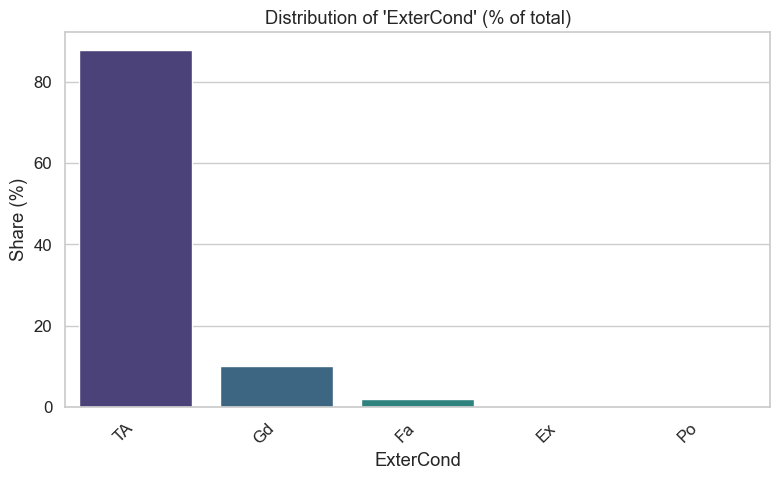


Rare categories:


Count  Percent
ExterCond                
Ex             3     0.21
Po             1     0.07


Feature analysis: 'Foundation'
🔹 Unique values: 6
🔹 Rare categories (<1.0%): 2


Count  Percent
Foundation                
PConc         647    44.32
CBlock        634    43.42
BrkTil        146    10.00
Slab           24     1.64
Stone           6     0.41
Wood            3     0.21

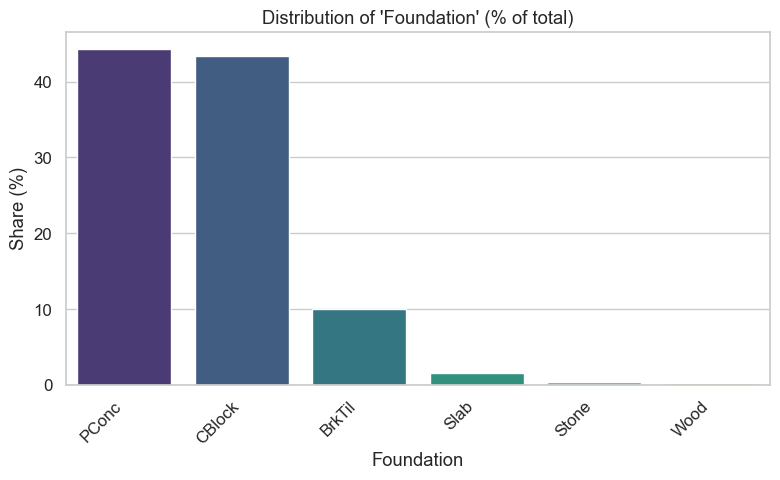


Rare categories:


Count  Percent
Foundation                
Stone           6     0.41
Wood            3     0.21


Feature analysis: 'BsmtQual'
🔹 Unique values: 5
🔹 Rare categories (<1.0%): 0


Count  Percent
BsmtQual                
TA          649    44.45
Gd          618    42.33
Ex          121     8.29
NaN          37     2.53
Fa           35     2.40

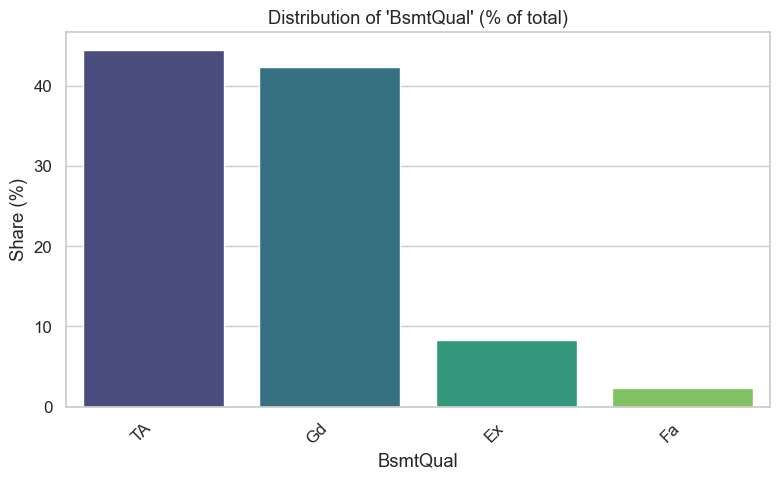


Feature analysis: 'BsmtCond'
🔹 Unique values: 5
🔹 Rare categories (<1.0%): 1


Count  Percent
BsmtCond                
TA         1311    89.79
Gd           65     4.45
Fa           45     3.08
NaN          37     2.53
Po            2     0.14

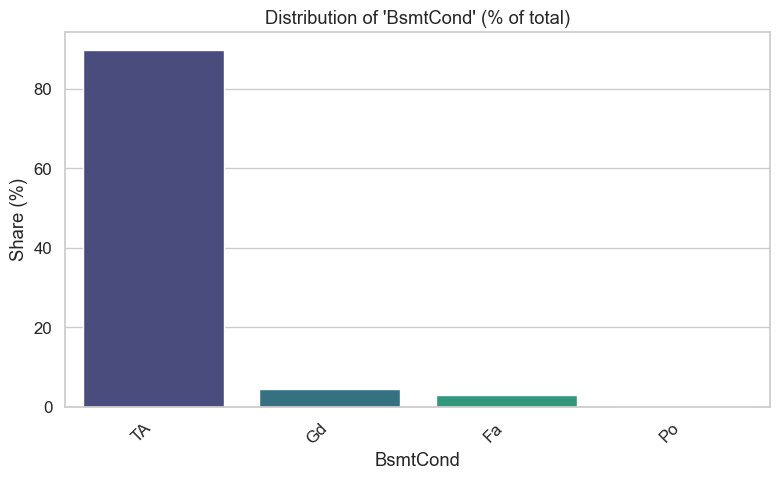


Rare categories:


Count  Percent
BsmtCond                
Po            2     0.14


Feature analysis: 'BsmtExposure'
🔹 Unique values: 5
🔹 Rare categories (<1.0%): 0


Count  Percent
BsmtExposure                
No              953    65.27
Av              221    15.14
Gd              134     9.18
Mn              114     7.81
NaN              38     2.60

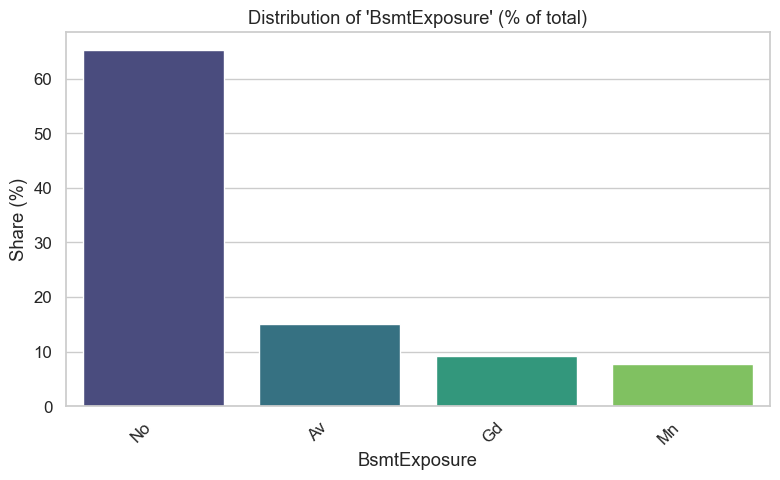


Feature analysis: 'BsmtFinType1'
🔹 Unique values: 7
🔹 Rare categories (<1.0%): 0


Count  Percent
BsmtFinType1                
Unf             430    29.45
GLQ             418    28.63
ALQ             220    15.07
BLQ             148    10.14
Rec             133     9.11
LwQ              74     5.07
NaN              37     2.53

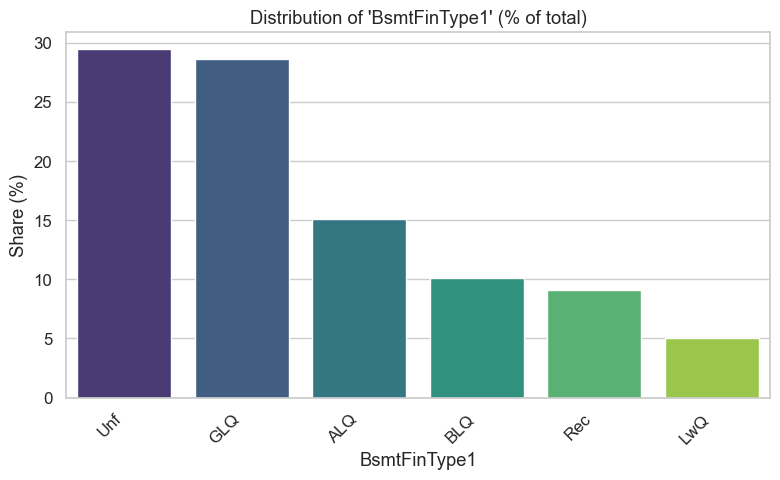


Feature analysis: 'BsmtFinType2'
🔹 Unique values: 7
🔹 Rare categories (<1.0%): 1


Count  Percent
BsmtFinType2                
Unf            1256    86.03
Rec              54     3.70
LwQ              46     3.15
NaN              38     2.60
BLQ              33     2.26
ALQ              19     1.30
GLQ              14     0.96

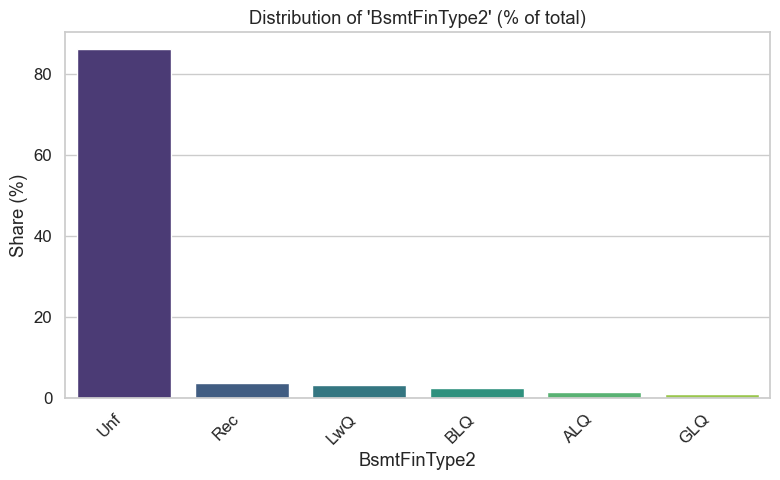


Rare categories:


Count  Percent
BsmtFinType2                
GLQ              14     0.96


Feature analysis: 'Heating'
🔹 Unique values: 6
🔹 Rare categories (<1.0%): 4


Count  Percent
Heating                
GasA      1428    97.81
GasW        18     1.23
Grav         7     0.48
Wall         4     0.27
OthW         2     0.14
Floor        1     0.07

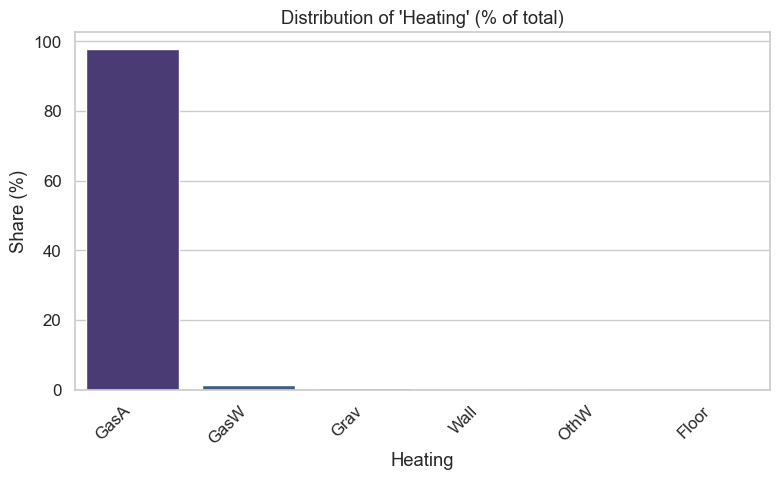


Rare categories:


Count  Percent
Heating                
Grav         7     0.48
Wall         4     0.27
OthW         2     0.14
Floor        1     0.07


Feature analysis: 'HeatingQC'
🔹 Unique values: 5
🔹 Rare categories (<1.0%): 1


Count  Percent
HeatingQC                
Ex           741    50.75
TA           428    29.32
Gd           241    16.51
Fa            49     3.36
Po             1     0.07

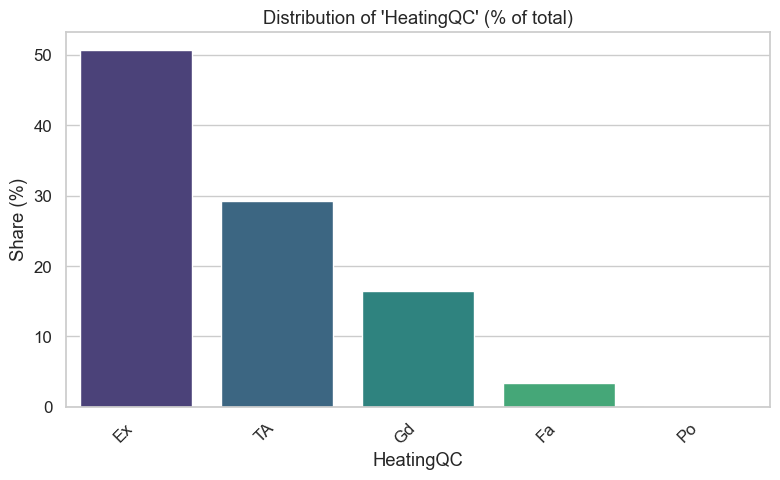


Rare categories:


Count  Percent
HeatingQC                
Po             1     0.07


Feature analysis: 'CentralAir'
🔹 Unique values: 2
🔹 Rare categories (<1.0%): 0


Count  Percent
CentralAir                
Y            1365    93.49
N              95     6.51

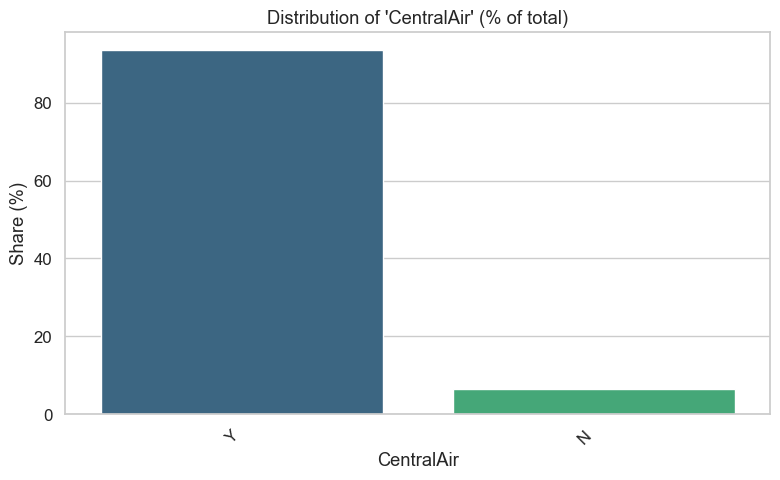


Feature analysis: 'Electrical'
🔹 Unique values: 6
🔹 Rare categories (<1.0%): 3


Count  Percent
Electrical                
SBrkr        1334    91.37
FuseA          94     6.44
FuseF          27     1.85
FuseP           3     0.21
Mix             1     0.07
NaN             1     0.07

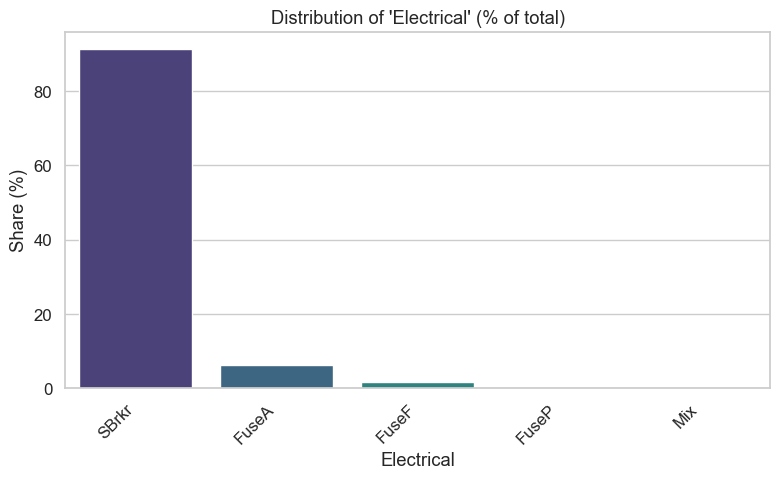


Rare categories:


Count  Percent
Electrical                
FuseP           3     0.21
Mix             1     0.07
NaN             1     0.07


Feature analysis: 'KitchenQual'
🔹 Unique values: 4
🔹 Rare categories (<1.0%): 0


Count  Percent
KitchenQual                
TA             735    50.34
Gd             586    40.14
Ex             100     6.85
Fa              39     2.67

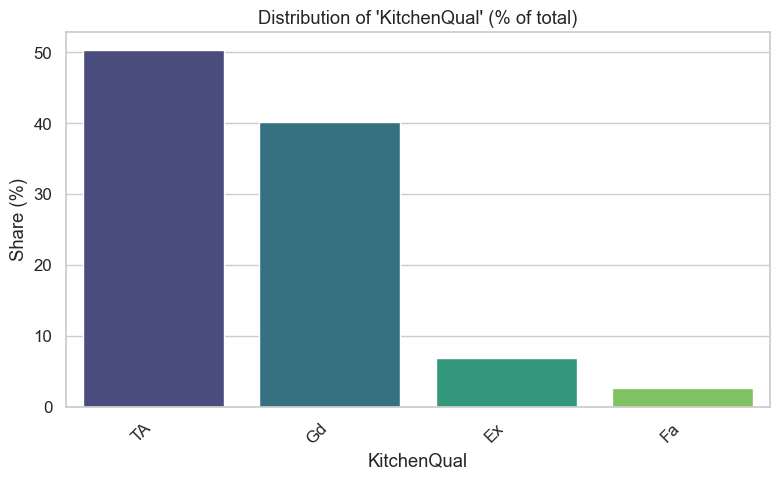


Feature analysis: 'Functional'
🔹 Unique values: 7
🔹 Rare categories (<1.0%): 3


Count  Percent
Functional                
Typ          1360    93.15
Min2           34     2.33
Min1           31     2.12
Mod            15     1.03
Maj1           14     0.96
Maj2            5     0.34
Sev             1     0.07

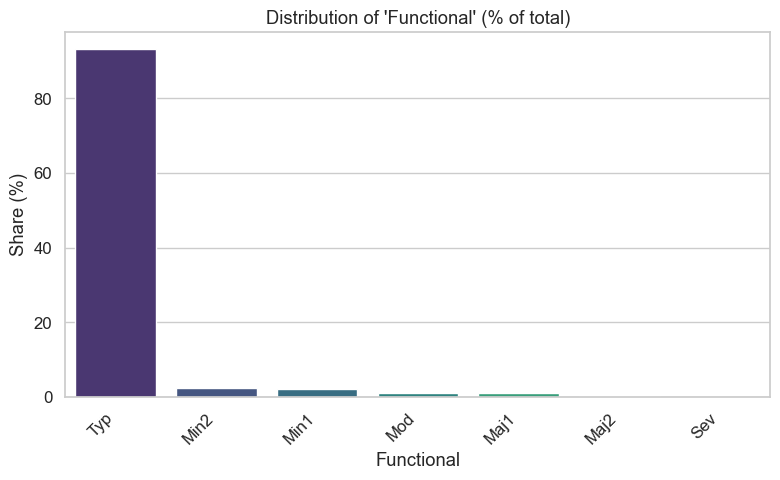


Rare categories:


Count  Percent
Functional                
Maj1           14     0.96
Maj2            5     0.34
Sev             1     0.07


Feature analysis: 'FireplaceQu'
🔹 Unique values: 6
🔹 Rare categories (<1.0%): 0


Count  Percent
FireplaceQu                
NaN            690    47.26
Gd             380    26.03
TA             313    21.44
Fa              33     2.26
Ex              24     1.64
Po              20     1.37

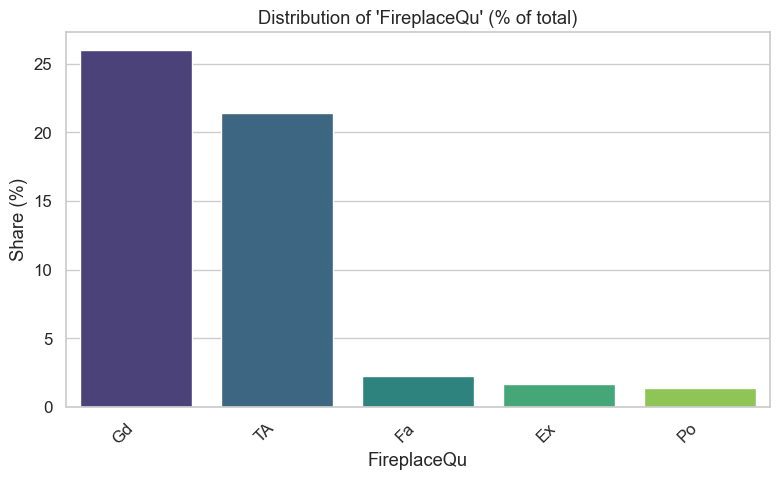


Feature analysis: 'GarageType'
🔹 Unique values: 7
🔹 Rare categories (<1.0%): 2


Count  Percent
GarageType                
Attchd        870    59.59
Detchd        387    26.51
BuiltIn        88     6.03
NaN            81     5.55
Basment        19     1.30
CarPort         9     0.62
2Types          6     0.41

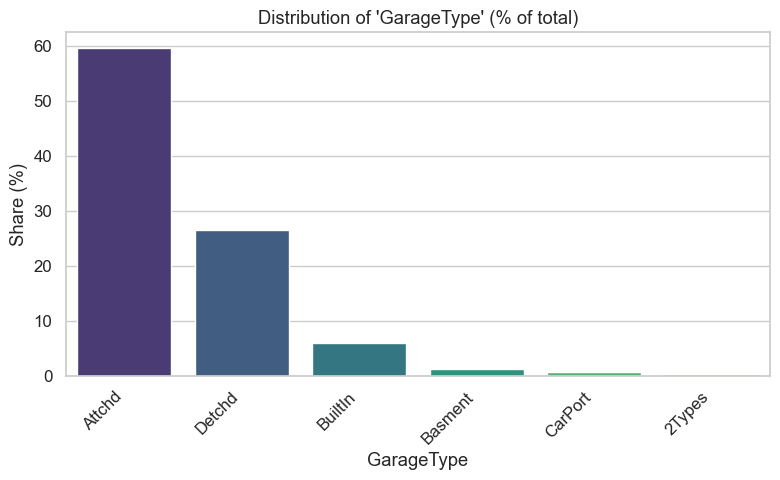


Rare categories:


Count  Percent
GarageType                
CarPort         9     0.62
2Types          6     0.41


Feature analysis: 'GarageFinish'
🔹 Unique values: 4
🔹 Rare categories (<1.0%): 0


Count  Percent
GarageFinish                
Unf             605    41.44
RFn             422    28.90
Fin             352    24.11
NaN              81     5.55

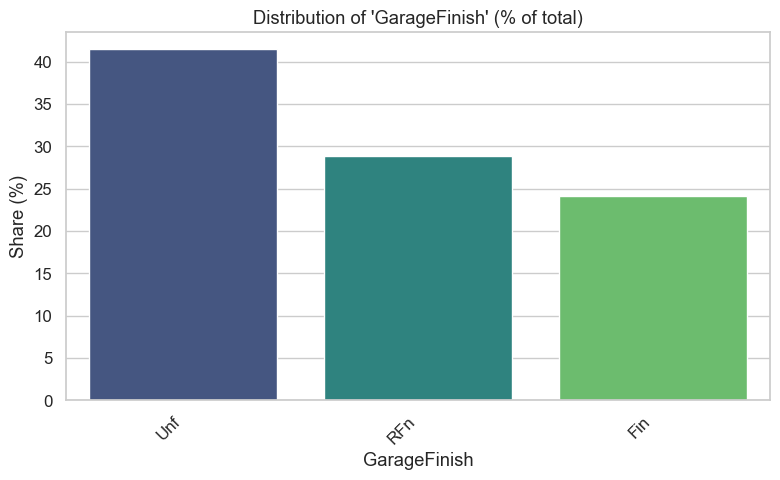


Feature analysis: 'GarageQual'
🔹 Unique values: 6
🔹 Rare categories (<1.0%): 3


Count  Percent
GarageQual                
TA           1311    89.79
NaN            81     5.55
Fa             48     3.29
Gd             14     0.96
Ex              3     0.21
Po              3     0.21

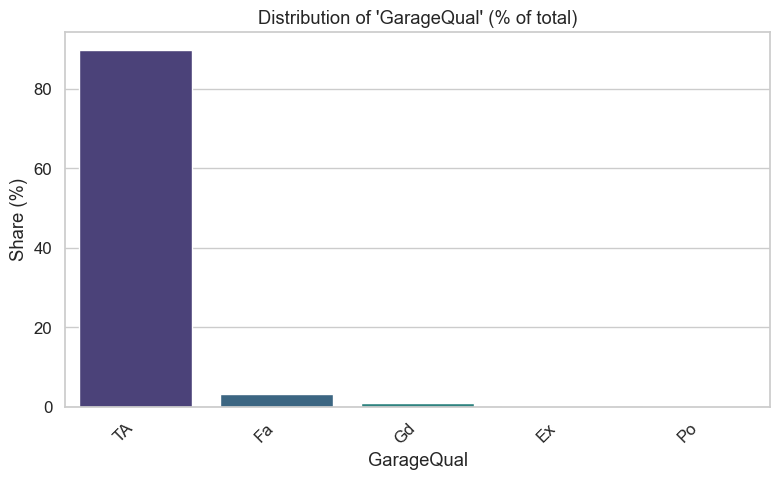


Rare categories:


Count  Percent
GarageQual                
Gd             14     0.96
Ex              3     0.21
Po              3     0.21


Feature analysis: 'GarageCond'
🔹 Unique values: 6
🔹 Rare categories (<1.0%): 3


Count  Percent
GarageCond                
TA           1326    90.82
NaN            81     5.55
Fa             35     2.40
Gd              9     0.62
Po              7     0.48
Ex              2     0.14

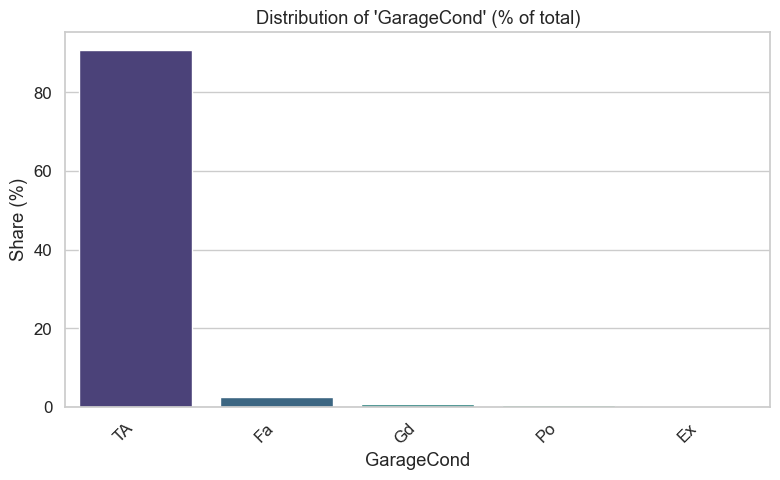


Rare categories:


Count  Percent
GarageCond                
Gd              9     0.62
Po              7     0.48
Ex              2     0.14


Feature analysis: 'PavedDrive'
🔹 Unique values: 3
🔹 Rare categories (<1.0%): 0


Count  Percent
PavedDrive                
Y            1340    91.78
N              90     6.16
P              30     2.05

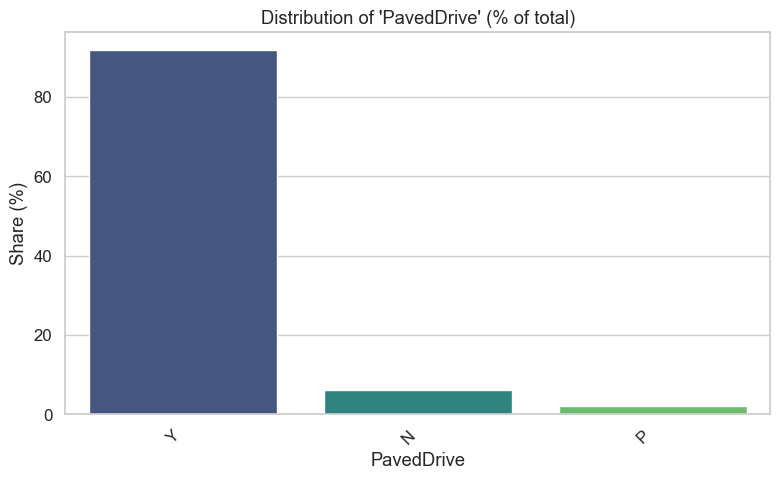


Feature analysis: 'PoolQC'
🔹 Unique values: 4
🔹 Rare categories (<1.0%): 3
Dominant value detected: 99.52% — added to low_info_features


Count  Percent
PoolQC                
NaN      1453    99.52
Gd          3     0.21
Ex          2     0.14
Fa          2     0.14

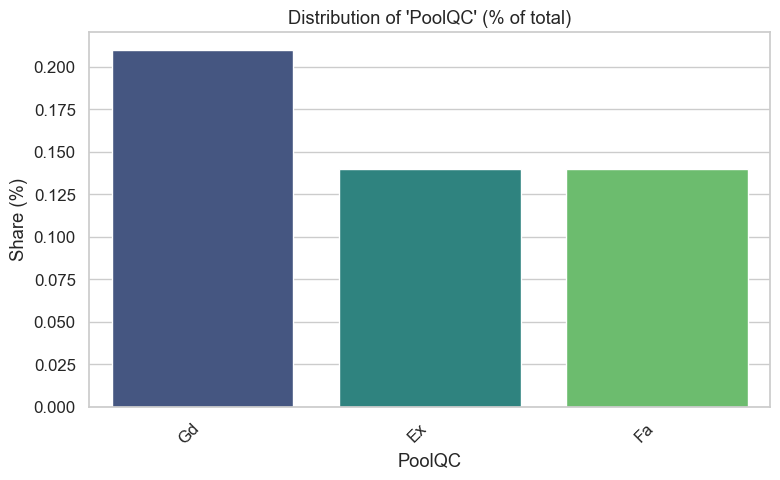


Rare categories:


Count  Percent
PoolQC                
Gd          3     0.21
Ex          2     0.14
Fa          2     0.14


Feature analysis: 'Fence'
🔹 Unique values: 5
🔹 Rare categories (<1.0%): 1


Count  Percent
Fence                
NaN     1179    80.75
MnPrv    157    10.75
GdPrv     59     4.04
GdWo      54     3.70
MnWw      11     0.75

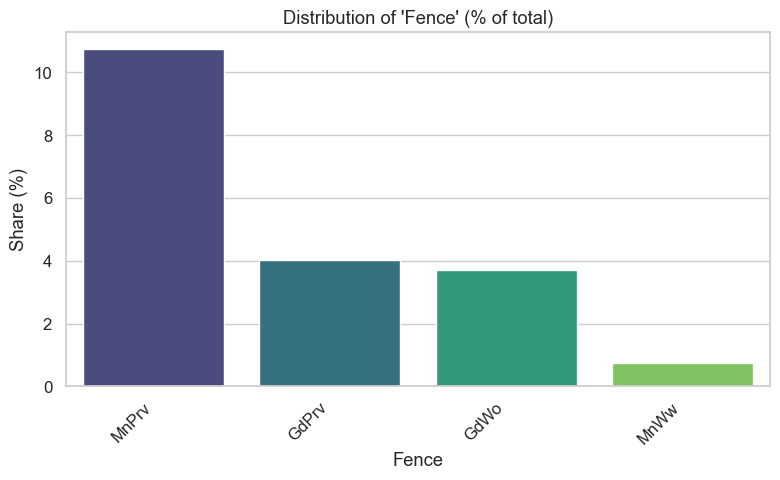


Rare categories:


Count  Percent
Fence                
MnWw      11     0.75


Feature analysis: 'MiscFeature'
🔹 Unique values: 5
🔹 Rare categories (<1.0%): 3


Count  Percent
MiscFeature                
NaN           1406    96.30
Shed            49     3.36
Gar2             2     0.14
Othr             2     0.14
TenC             1     0.07

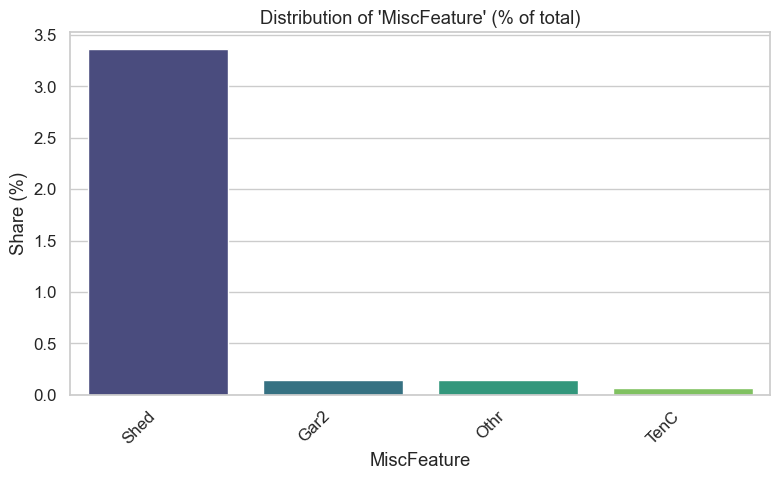


Rare categories:


Count  Percent
MiscFeature                
Gar2             2     0.14
Othr             2     0.14
TenC             1     0.07


Feature analysis: 'SaleType'
🔹 Unique values: 9
🔹 Rare categories (<1.0%): 6


Count  Percent
SaleType                
WD         1267    86.78
New         122     8.36
COD          43     2.95
ConLD         9     0.62
ConLI         5     0.34
ConLw         5     0.34
CWD           4     0.27
Oth           3     0.21
Con           2     0.14

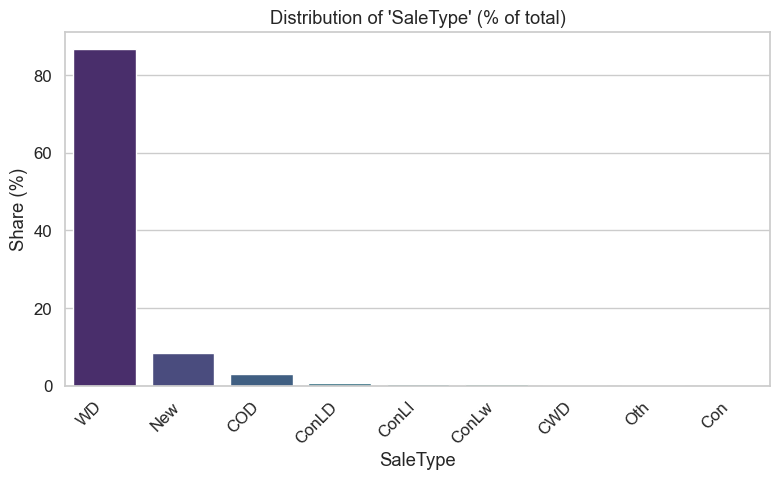


Rare categories:


Count  Percent
SaleType                
ConLD         9     0.62
ConLI         5     0.34
ConLw         5     0.34
CWD           4     0.27
Oth           3     0.21
Con           2     0.14


Feature analysis: 'SaleCondition'
🔹 Unique values: 6
🔹 Rare categories (<1.0%): 2


Count  Percent
SaleCondition                
Normal          1198    82.05
Partial          125     8.56
Abnorml          101     6.92
Family            20     1.37
Alloca            12     0.82
AdjLand            4     0.27

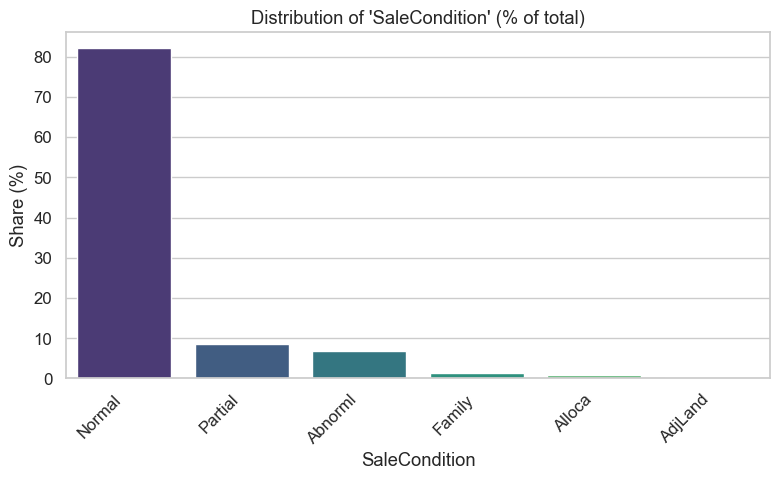


Rare categories:


Count  Percent
SaleCondition                
Alloca            12     0.82
AdjLand            4     0.27


Feature analysis: 'MoSold'
🔹 Unique values: 12
🔹 Rare categories (<1.0%): 0


Count  Percent
MoSold                
6         253    17.33
7         234    16.03
5         204    13.97
4         141     9.66
8         122     8.36
3         106     7.26
10         89     6.10
11         79     5.41
9          63     4.32
12         59     4.04
1          58     3.97
2          52     3.56

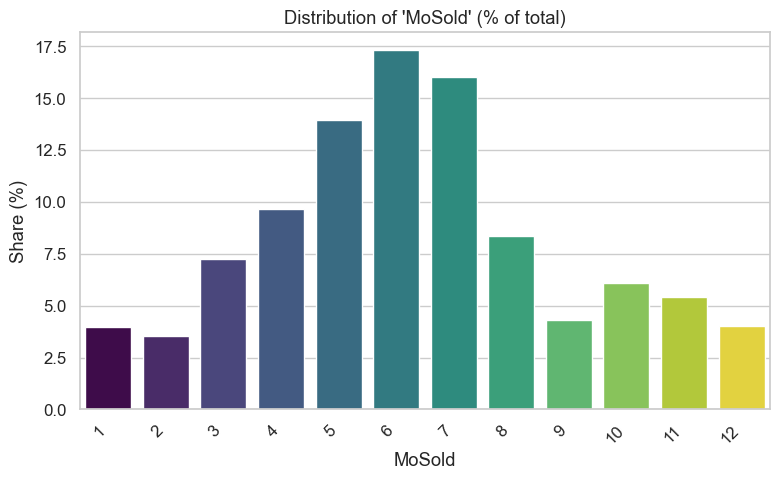


Feature analysis: 'YrSold'
🔹 Unique values: 5
🔹 Rare categories (<1.0%): 0


Count  Percent
YrSold                
2009      338    23.15
2007      329    22.53
2006      314    21.51
2008      304    20.82
2010      175    11.99

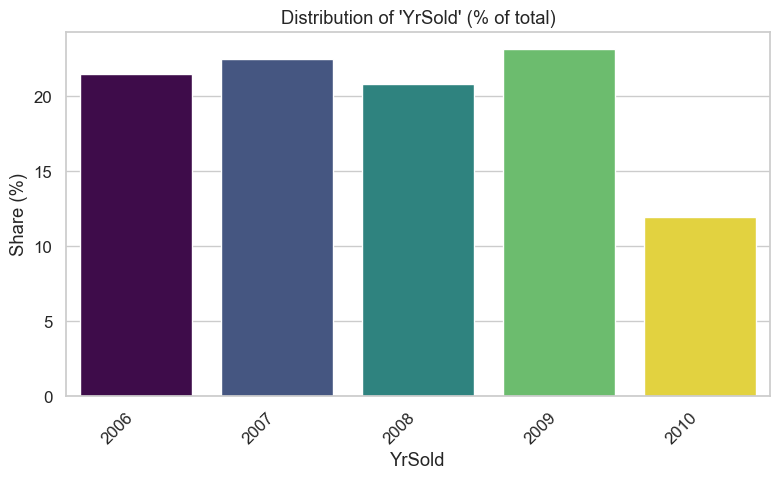


Feature analysis: 'MSSubClass'
🔹 Unique values: 15
🔹 Rare categories (<1.0%): 3


Count  Percent
MSSubClass                
20            536    36.71
60            299    20.48
50            144     9.86
120            87     5.96
30             69     4.73
160            63     4.32
70             60     4.11
80             58     3.97
90             52     3.56
190            30     2.05
85             20     1.37
75             16     1.10
45             12     0.82
180            10     0.68
40              4     0.27

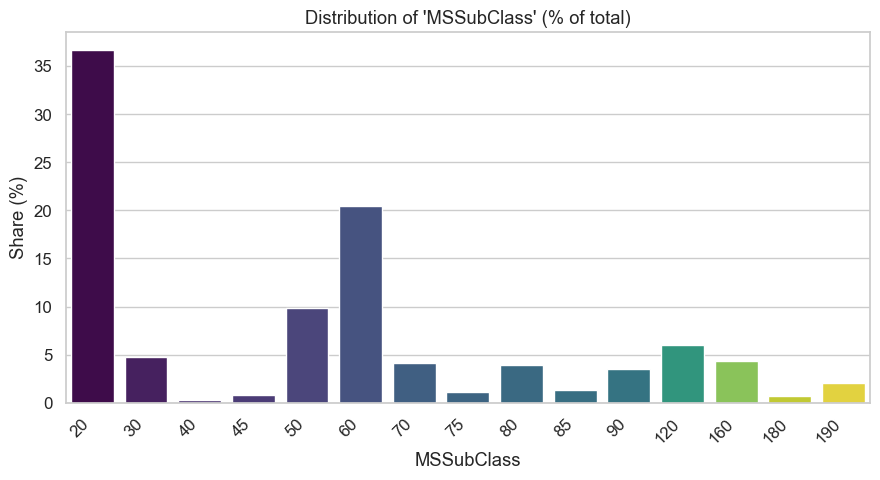


Rare categories:


Count  Percent
MSSubClass                
45             12     0.82
180            10     0.68
40              4     0.27


Feature analysis: 'OverallQual'
🔹 Unique values: 10
🔹 Rare categories (<1.0%): 2


Count  Percent
OverallQual                
5              397    27.19
6              374    25.62
7              319    21.85
8              168    11.51
4              116     7.95
9               43     2.95
3               20     1.37
10              18     1.23
2                3     0.21
1                2     0.14

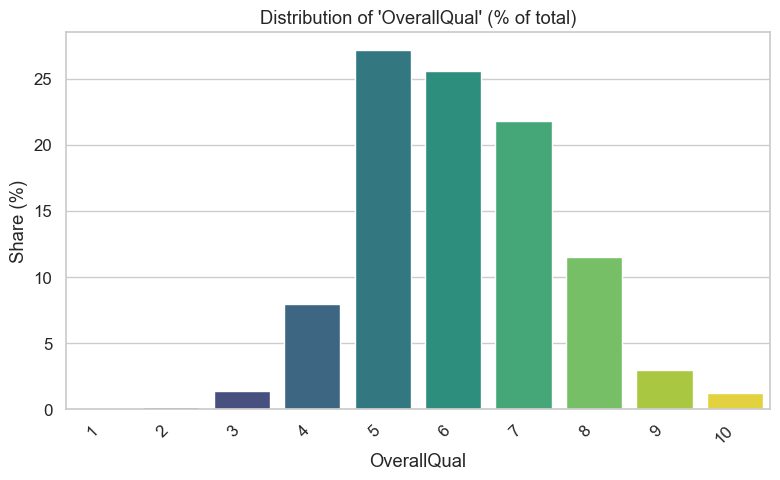


Rare categories:


Count  Percent
OverallQual                
2                3     0.21
1                2     0.14


Feature analysis: 'OverallCond'
🔹 Unique values: 9
🔹 Rare categories (<1.0%): 2


Count  Percent
OverallCond                
5              821    56.23
6              252    17.26
7              205    14.04
8               72     4.93
4               57     3.90
3               25     1.71
9               22     1.51
2                5     0.34
1                1     0.07

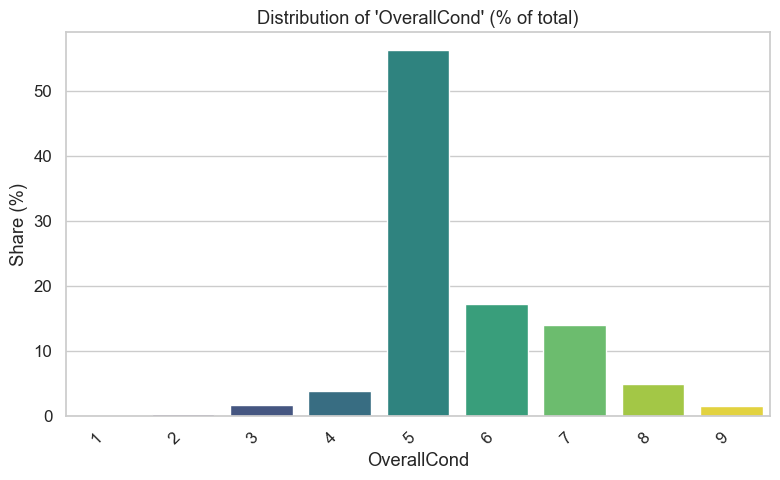


Rare categories:


Count  Percent
OverallCond                
2                5     0.34
1                1     0.07

Low-information features:
  - Street: 99.59%
  - Utilities: 99.93%
  - Condition2: 98.97%
  - RoofMatl: 98.22%
  - PoolQC: 99.52%


In [15]:
# Global list to collect low-information features
low_info_features = []

def analyze_categorical_feature(df, column, rare_thresh=0.01, dominant_thresh=0.98, show_rare=True):
    """
    Analyze a categorical feature:
    - Displays count and percentage of each category
    - Highlights rare categories (below threshold)
    - Plots a bar chart (percent-based)
    - Adds features with dominant values to a global list

    Parameters:
        df: DataFrame
        column: str — name of the column to analyze
        rare_thresh: float — threshold for rare category (e.g. 0.01 = 1%)
        dominant_thresh: float — threshold for dominant category (e.g. 0.98 = 98%)
        show_rare: bool — whether to print rare category table
    """
    print(f"\nFeature analysis: '{column}'")

    # Calculate value counts and percentage
    counts = df[column].value_counts(dropna=False)
    percents = counts / len(df)

    # Combine into a single DataFrame
    dist = pd.DataFrame({
        "Count": counts,
        "Percent": (percents * 100).round(2)
    })

    # Identify rare categories
    rare = percents[percents < rare_thresh]
    print(f"🔹 Unique values: {len(counts)}")
    print(f"🔹 Rare categories (<{rare_thresh*100:.1f}%): {len(rare)}")

    # Check for dominance
    top_share = percents.iloc[0]
    if top_share >= dominant_thresh:
        print(f"Dominant value detected: {top_share:.2%} — added to low_info_features")
        low_info_features.append((column, top_share))

    # Display full distribution
    display(dist)

    # Reset index for plotting
    dist_reset = dist.reset_index(names="Category")

    # Plot using Category for x and hue
    plt.figure(figsize=(max(8, len(dist) * 0.6), 5))
    sns.barplot(
        data=dist_reset,
        x="Category",
        y="Percent",
        hue="Category",
        palette="viridis",
        legend=False
    )
    plt.title(f"Distribution of '{column}' (% of total)")
    plt.xlabel(column)
    plt.ylabel("Share (%)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # Show rare categories
    if show_rare and not rare.empty:
        print("\nRare categories:")
        display(dist.loc[rare.index])
        
for col in categorical_features:
    analyze_categorical_feature(train, col)
    
print("Low-information features:")
for feature, share in low_info_features:
    print(f"  - {feature}: {share:.2%}")

#### Key Takeaways
1. **Purge the four useless columns** — free model capacity.  
2. **Protect the pool info** — extremely predictive despite rarity.  
3. **Merge ultra-rare labels** to dodge noise and leakage.  
4. **Treat “missing” as “absent”** for structural elements.  
5. **Respect ordinal meaning** wherever it exists.  

### 11. Correlation matrix (top features)
I focus on the strongest 20 correlations with the target and draw two complementary visuals.

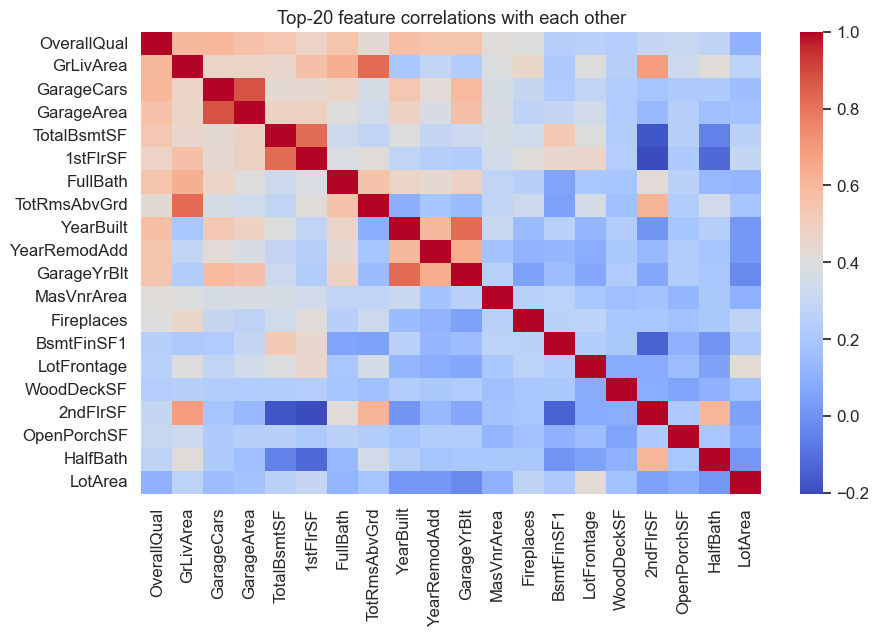

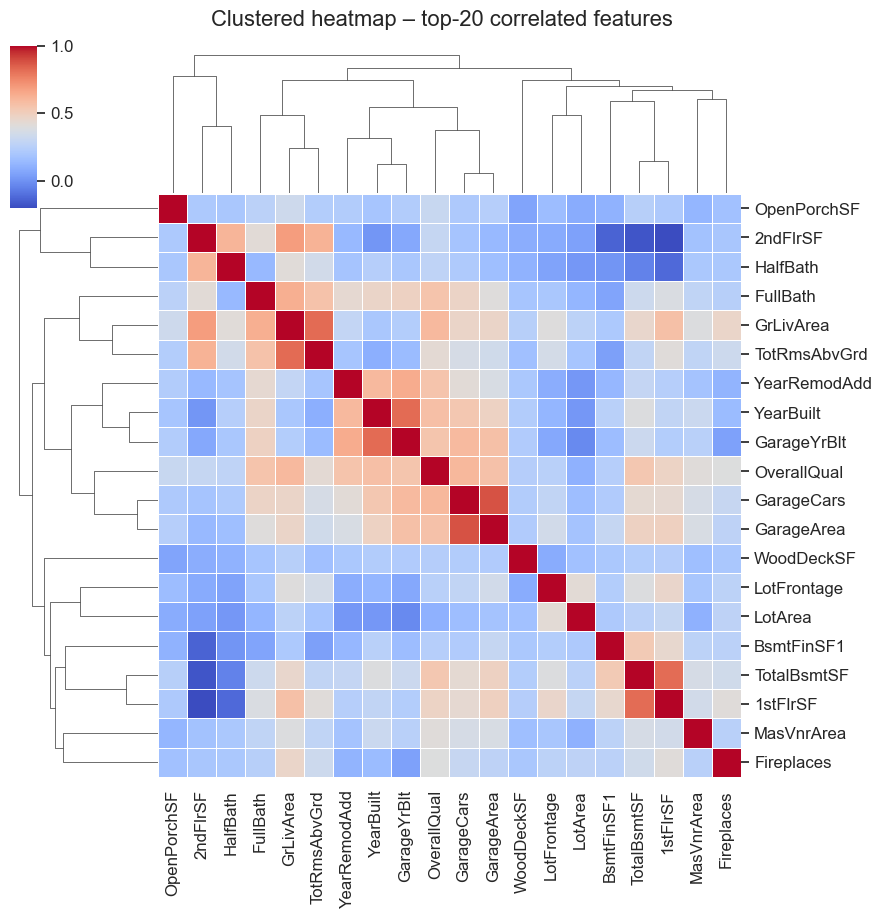

In [104]:
corr = train.corr(numeric_only=True)["SalePrice"].abs().sort_values(ascending=False)
top20 = corr.index[1:21]

# classic heatmap
sns.heatmap(train[top20].corr(), cmap="coolwarm", annot=False)
plt.title("Top-20 feature correlations with each other")
plt.show()

# clustering heatmap for pattern discovery
sns.clustermap(
    train[top20].corr(), cmap="coolwarm", linewidths=.5, figsize=(9, 9),
    cbar_pos=(0.02, .8, .03, .18)
)
plt.suptitle("Clustered heatmap – top-20 correlated features", y=1.02)
plt.show()

#### Conclusions from Correlation Analysis (Top 20 Features)

##### 1. Strongest individual correlations with `SalePrice`
| Feature        | Corr. (≈) | Comment |
|----------------|-----------|---------|
| `OverallQual`  | **0.79**  | Quality rating is the single most influential feature. |
| `GrLivArea`    | 0.70      | Total above-ground living area strongly drives price. |
| `GarageCars`   | 0.64      | Number of garage spaces more important than area. |
| `GarageArea`   | 0.62      | Closely follows `GarageCars`; multicollinearity risk. |
| `TotalBsmtSF`  | 0.61      | Basement size highly predictive. |
| `1stFlrSF`     | 0.60      | First-floor area overlaps with total basement size. |

*Other features (e.g., `FullBath`, `YearBuilt`, `MasVnrArea`) show moderate positive correlations (0.4–0.6). No strong negative correlations were observed.*

---

##### 2. Multicollinearity patterns
*From both the standard and clustered heatmaps.*

| Correlated pair / cluster | Observation | Action |
|---------------------------|-------------|--------|
| `GarageCars` ↔ `GarageArea` | r > 0.80 | Keep one or apply regularisation. |
| `TotalBsmtSF` ↔ `1stFlrSF` | r ≈ 0.75 | Redundant size measures; consider PCA or feature drop. |
| `GrLivArea` ↔ `TotRmsAbvGrd` | r ≈ 0.65 | Rooms count scales with living area. |
| `YearBuilt` ↔ `YearRemodAdd` ↔ `GarageYrBlt` | r ≈ 0.50 | Construction/remodel years form a temporal cluster. |

---

##### 3. Clustered heatmap insights
* Dendrogram groups **size-related variables** together (`GrLivArea`, floor areas, basement areas).  
* **Quality metrics** (`OverallQual`, `MasVnrArea`) form another subcluster.  
* **Bathroom counts** (`FullBath`, `HalfBath`) sit near living-area features.  
* Porch/deck variables (`WoodDeckSF`, `OpenPorchSF`) align loosely with lot frontage and lot area but have weak correlations overall.

---

##### 4. Implications for modelling
* **Feature selection or dimensionality reduction** can cut redundancy in highly correlated size features.  
* Regularised models (Ridge, Lasso, ElasticNet) will mitigate multicollinearity automatically; for tree models it is less critical.  
* Retain the most predictive representative from each tight cluster to reduce noise and overfitting risk.

> These correlation findings will guide feature engineering and selection steps in **02_preprocess.py** and the modelling notebook.


### 12. Executive Summary & Pre-processing Roadmap

#### 1. Key EDA Insights

| Aspect                         | Main findings | Impact on modelling |
|--------------------------------|---------------|---------------------|
| **Target (`SalePrice`)**       | Right-skew (skew ≈ 1.88); outliers > \$500 k | Log-transform target; inspect top-1 % high prices |
| **Missing values**             | 4 ultra-sparse cols (≥ 90 % NaN); structural NaNs in Pool, Fence, Garage, Basement; numeric gap in `LotFrontage` | Drop / binarise ultra-sparse cols; fill structural NaNs with `"None"`/0; impute `LotFrontage` by neighbourhood median |
| **Skewed continuous features** | 18 features have skew > 1; 5 are extremely sparse counts | Log/Box-Cox those 18; convert very sparse counts (`PoolArea`, `MiscVal`, etc.) to binary *has / has-not* |
| **Outliers**                   | Area features (`LotArea`, `GrLivArea`, `TotalBsmtSF`, etc.) show extreme values | Clip / winsorise or use robust models |
| **Correlations & clusters**    | Size cluster, Year cluster, Garage cluster; `OverallQual` top predictor (r ≈ 0.79) | Drop redundant twins (e.g. `GarageArea` vs `GarageCars`) **or** rely on regularisation; engineer age features |

---

#### 2. Pre-processing Plan (`02_preprocess.py`)

| Step | Action |
|------|--------|
| **2.1 Index & duplicates** | Set `Id` as `index`; confirm no duplicate rows |
| **2.2 Missing-value handling** | 1) **Drop / binarise** `PoolQC`, `MiscFeature`, `Alley`, `Fence`<br>2) Fill structural NaNs (`Pool*`, `Fence`, `FireplaceQu`, `Garage*`, `Bsmt*`) with `"None"`/0<br>3) Impute `LotFrontage` with **median per `Neighborhood`**<br>4) Fill single missing `Electrical` with mode |
| **2.3 Feature engineering** | *Age features*: `HouseAge = YrSold – YearBuilt`, `RemodelAge`, `GarageAge`<br>*Total porch sf*: sum of all porch areas<br>*Binary flags* for very sparse continuous cols |
| **2.4 Skew correction** | Apply `np.log1p` (or Box-Cox) to all numeric cols with skew > 1 (list from skew table) |
| **2.5 Target transform** | Create `y = log1p(SalePrice)`; store original for reference |
| **2.6 Encoding** | *Ordinal* keep as numeric (`OverallQual`, `OverallCond`)<br>*Nominal* → One-hot (or Target / CatBoost encoding in second pass) |
| **2.7 Scaling** | `StandardScaler` on numeric block (helps ElasticNet / NN); tree models ignore scale |
| **2.8 Outlier treatment** | Winsorise upper 1 % of area variables **or** fit robust models and monitor residuals |
| **2.9 Feature selection** | Option A: retain all and rely on regularisation<br>Option B: drop one of each highly collinear pair (e.g. `GarageArea`) |